# **Chronic Disease Insights: Trends, Demographics, and Public Health**

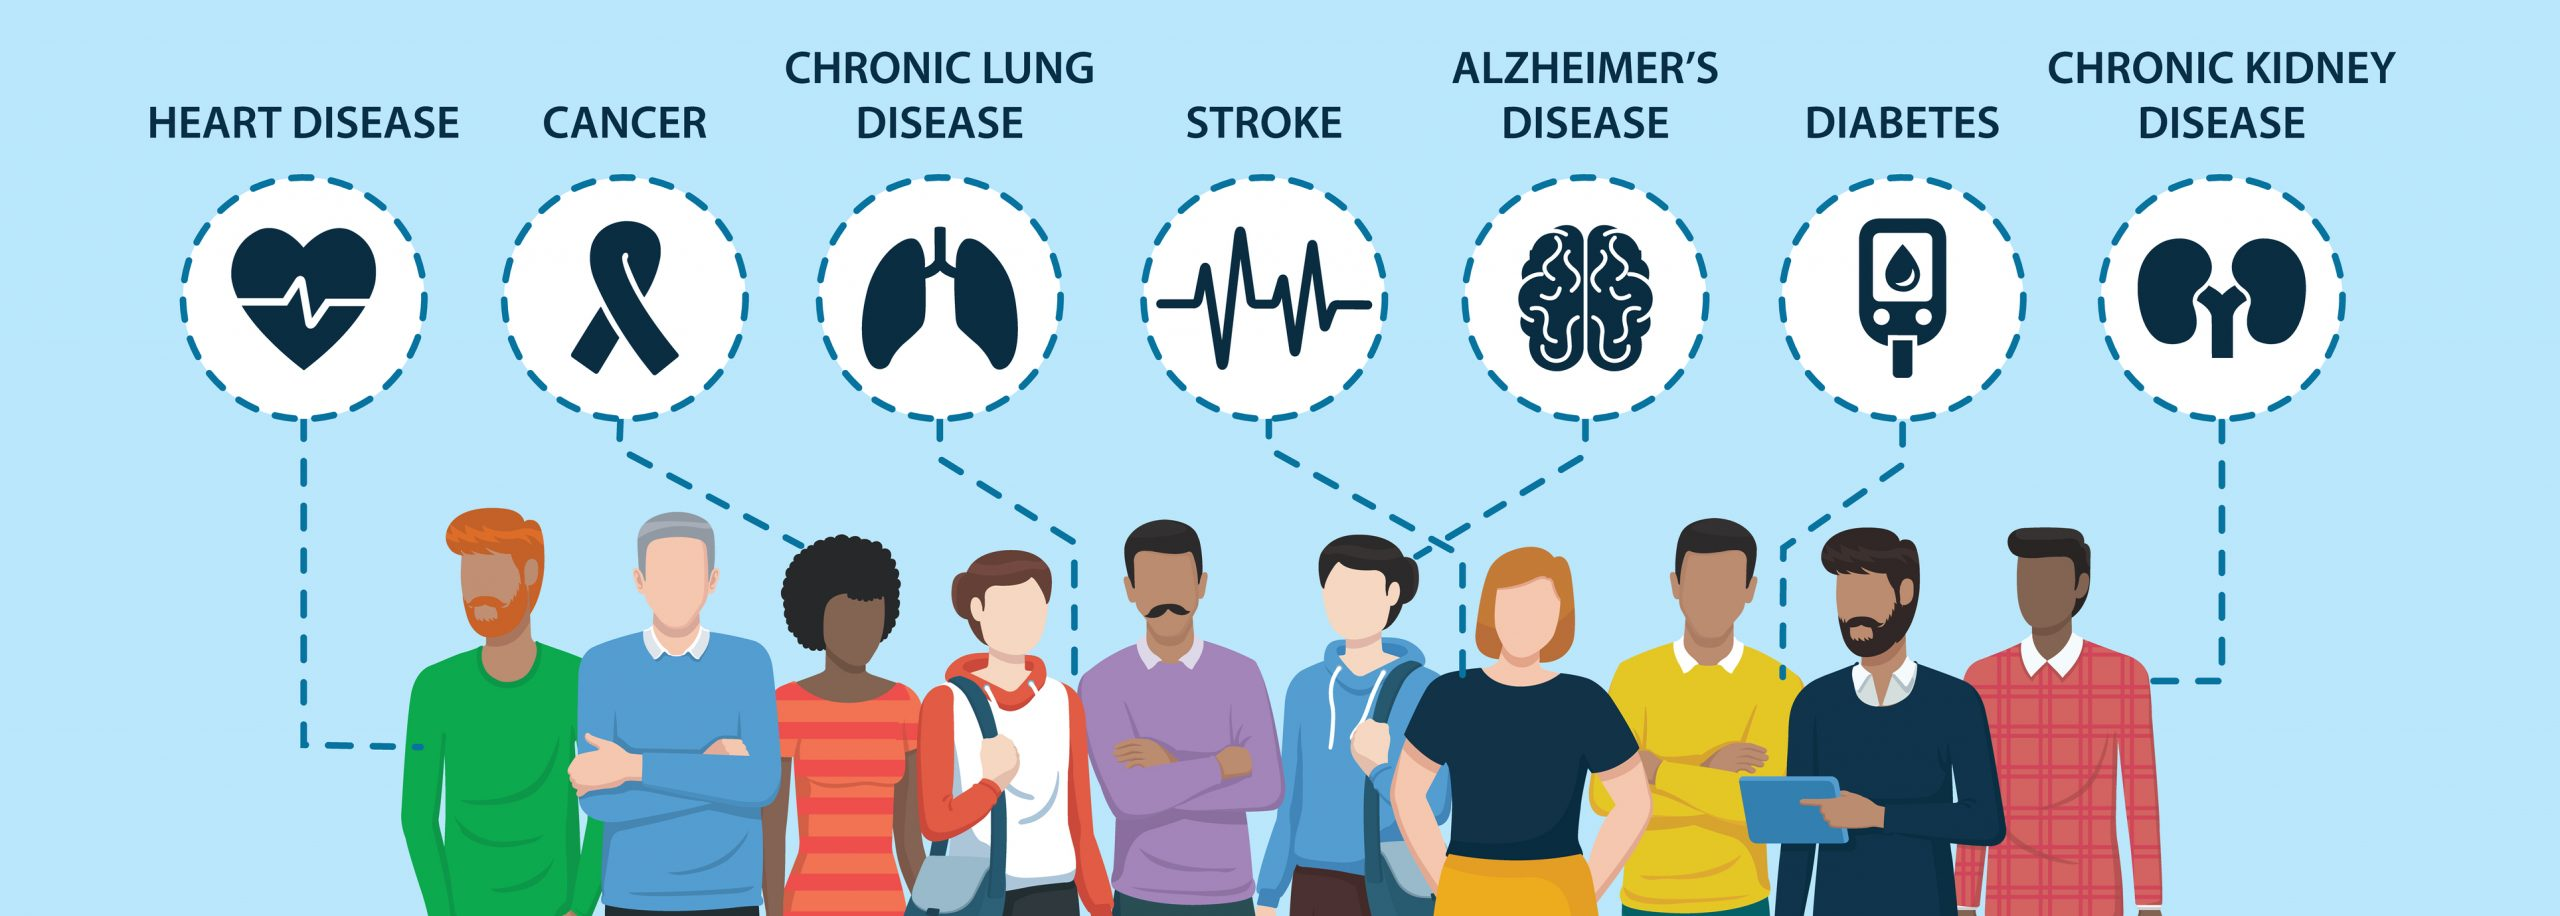

> *by*\
| Arun Thakur | [LinkedIn](https://www.linkedin.com/in/thakurarun/) |\
| Caleb Felton | [LinkedIn](https://www.linkedin.com/in/caleb-felton/) |\
| Sushmitha Halli Sudhakara | [LinkedIn](https://www.linkedin.com/in/hssushmitha/) |


## Abstract
In today's data-driven landscape, the quest for valuable insights to inform public health strategies takes center stage. Our project, "Chronic Disease Insights: Trends, Demographics, and Public Health," is rooted in a comprehensive dataset sourced from the "[**U.S. Chronic Disease Indicators (CDI)**](https://catalog.data.gov/dataset/u-s-chronic-disease-indicators-cdi)" website.

Much like how a global environment offers access to diverse products and services, our project opens the door to a wealth of information related to chronic disease indicators within the United States. We recognize the power of data analysis in transcending barriers, allowing us to explore trends, disparities, and potential interventions that can shape a healthier future for diverse populations.

Our mission is to harness the potential of this dataset to equip stakeholders in the field of public health with evidence-based insights and solutions. By conducting rigorous analyses, we aim to empower decision-makers, healthcare professionals, and policymakers to make informed choices and create a more health-conscious and equitable society.


### Data description

The "U.S. Chronic Disease Indicators (CDI)" dataset is a comprehensive repository of critical information that aids our endeavor. This dataset provides us with a wealth of information regarding chronic disease indicators within the United States. It covers a wide array of crucial aspects, including the year of observation between 2001 to 2021, geographic locations (including states and territories), disease topics, demographics (such as gender and race/ethnicity), and various data values associated with chronic diseases, including prevalence rates, and more. Our analysis relies on this dataset as the cornerstone of our comprehensive examination of chronic diseases in the United States. These diverse elements within the dataset form the foundation for our comprehensive analysis of chronic diseases, helping us uncover patterns, disparities, and potential interventions to inform evidence-based public health strategies.





Apart from CDI data, we referred to "National Health and Nutrition Examination Survey (NHANES) - Cardiovascular Disease (CVD) Surveillance System" too. Here is the link to thw website we referred to.

https://healthdata.gov/dataset/National-Health-and-Nutrition-Examination-Survey-N/5qtx-zbdc



### Goal


*   ***Data Cleaning and Wrangling:*** Ensure data integrity by addressing missing values and inconsistencies, and evaluate the reliability of data sources and types.

*   ***Trends Analysis:*** Identify significant trends and patterns in chronic disease indicators over the years.

*   ***Statistical Analysis:*** Perform statistical tests to assess relationships between variables, such as correlations between alcohol consumption and chronic liver disease mortality rates.

*   ***Topic Analysis:*** Analyze disease topics to determine which chronic diseases are more prevalent or have shown significant changes over time.

*   ***Anomaly Detection:*** Identify unusual patterns in the data that may require further investigation or intervention.

*   ***Demographic Analysis:*** Explore the impact of demographics (gender, race/ethnicity) on chronic disease prevalence to identify vulnerable populations.


*   ***Data Visualization:*** Create informative visualizations to present findings effectively to stakeholders and the public.


*   ***Public Health Insights:*** Use data-driven insights to inform public health policies and interventions, with a focus on addressing disparities in disease prevalence.

### Target Audience

Our project, "Chronic Disease Insights: Trends, Demographics, and Public Health," is intended for a diverse audience interested in public health and data-driven analysis. This includes public health professionals, healthcare providers, researchers, government agencies, educational institutions, non-governmental organizations, and the general public. Our goal is to offer valuable insights and data-driven knowledge that can enhance understanding and decision-making in the field of public health.

## Project Contribution

image.png


## Raw Dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import scipy as sp
import seaborn as sns
from scipy.stats import nbinom
from scipy.stats import poisson
from scipy.stats import geom
from scipy.stats import hypergeom
from scipy.stats import binom
import matplotlib.pyplot as plt
from google.colab import files
from IPython.display import Image
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))

In [ ]:
cdi_data = pd.read_csv('/content/drive/MyDrive/cs620/Project/USChronicDiseaseIndicators(CDI)/U.S._Chronic_Disease_Indicators__CDI_.csv')

<ipython-input-72-21ac17078470>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  cdi_data = pd.read_csv('/content/drive/MyDrive/cs620/Project/USChronicDiseaseIndicators(CDI)/U.S._Chronic_Disease_Indicators__CDI_.csv')


In [ ]:
print(f"Number of rows and columns in the dataset: {cdi_data.shape}")

Number of rows and columns in the dataset: (1185676, 34)


In [ ]:
print(f"Different columns:\n {cdi_data.columns}")

Different columns:
 Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType',
       'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
       'DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'GeoLocation', 'ResponseID', 'LocationID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')


In [ ]:
print("First few rows of raw data:\n")

cdi_data.head()

First few rows of raw data:



YearStart  YearEnd LocationAbbr    LocationDesc DataSource  \
0       2010     2010           OR          Oregon       NVSS   
1       2019     2019           AZ         Arizona      YRBSS   
2       2019     2019           OH            Ohio      YRBSS   
3       2019     2019           US   United States      YRBSS   
4       2015     2015           VI  Virgin Islands      YRBSS   

                    Topic                      Question  Response  \
0  Cardiovascular Disease  Mortality from heart failure       NaN   
1                 Alcohol       Alcohol use among youth       NaN   
2                 Alcohol       Alcohol use among youth       NaN   
3                 Alcohol       Alcohol use among youth       NaN   
4                 Alcohol       Alcohol use among youth       NaN   

  DataValueUnit     DataValueType DataValue  DataValueAlt  \
0           NaN            Number        30         30.00   
1             %  Crude Prevalence      29.5         29.50   
2             %  Crude Prevalence      22.5         22.50   
3             %  Crude Prevalence      13.9         13.90   
4             %  Crude Prevalence       NaN           NaN   

  DataValueFootnoteSymbol  DatavalueFootnote  LowConfidenceLimit  \
0                     NaN                NaN                 NaN   
1                     NaN                NaN               24.90   
2                     NaN                NaN               17.00   
3                     NaN                NaN               10.40   
4                       -  No data available                 NaN   

   HighConfidenceLimit StratificationCategory1  \
0                  NaN          Race/Ethnicity   
1                34.70                  Gender   
2                29.10                  Gender   
3                18.40          Race/Ethnicity   
4                  NaN                  Gender   

                    Stratification1  StratificationCategory2  Stratification2  \
0  American Indian or Alaska Native                      NaN              NaN   
1                            Female                      NaN              NaN   
2                              Male                      NaN              NaN   
3               Asian, non-Hispanic                      NaN              NaN   
4                              Male                      NaN              NaN   

   StratificationCategory3  Stratification3  \
0                      NaN              NaN   
1                      NaN              NaN   
2                      NaN              NaN   
3                      NaN              NaN   
4                      NaN              NaN   

                                      GeoLocation  ResponseID  LocationID  \
0   POINT (-120.15503132599969 44.56744942400047)         NaN          41   
1  POINT (-111.76381127699972 34.865970280000454)         NaN           4   
2    POINT (-82.40426005599966 40.06021014100048)         NaN          39   
3                                             NaN         NaN          59   
4                    POINT (-64.896335 18.335765)         NaN          78   

  TopicID QuestionID DataValueTypeID StratificationCategoryID1  \
0     CVD     CVD1_4            NMBR                      RACE   
1     ALC     ALC1_1         CRDPREV                    GENDER   
2     ALC     ALC1_1         CRDPREV                    GENDER   
3     ALC     ALC1_1         CRDPREV                      RACE   
4     ALC     ALC1_1         CRDPREV                    GENDER   

  StratificationID1  StratificationCategoryID2  StratificationID2  \
0              AIAN                        NaN                NaN   
1              GENF                        NaN                NaN   
2              GENM                        NaN                NaN   
3               ASN                        NaN                NaN   
4              GENM                        NaN                NaN   

   StratificationCategoryID3  StratificationID3  
0                        

In [ ]:
Total = cdi_data.isnull().sum()
Total_Percent = round(cdi_data.isnull().sum()*100/cdi_data.shape[0],2)
missing_data = pd.concat([Total, Total_Percent], axis=1, keys=['Total Missing Values', 'Total_Percent'])
missing_data

Total Missing Values  Total_Percent
YearStart                                     0           0.00
YearEnd                                       0           0.00
LocationAbbr                                  0           0.00
LocationDesc                                  0           0.00
DataSource                                    0           0.00
Topic                                         0           0.00
Question                                      0           0.00
Response                                1185676         100.00
DataValueUnit                            152123          12.83
DataValueType                                 0           0.00
DataValue                                378734          31.94
DataValueAlt                             381098          32.14
DataValueFootnoteSymbol                  791966          66.79
DatavalueFootnote                        791966          66.79
LowConfidenceLimit                       503296          42.45
HighConfidenceLimit                      503296          42.45
StratificationCategory1                       0           0.00
Stratification1                               0           0.00
StratificationCategory2                 1185676         100.00
Stratification2                         1185676         100.00
StratificationCategory3                 1185676         100.00
Stratification3                         1185676         100.00
GeoLocation                               10166           0.86
ResponseID                              1185676         100.00
LocationID                                    0           0.00
TopicID                                       0           0.00
QuestionID                                    0           0.00
DataValueTypeID                               0           0.00
StratificationCategoryID1                     0           0.00
StratificationID1                             0           0.00
StratificationCategoryID2               1185676         100.00
StratificationID2                       1185676         100.00
StratificationCategoryID3               1185676         100.00
StratificationID3                       1185676         100.00

In [ ]:
print(f"100% missing data can be just dropped and the columns with 100% missing data are: {missing_data[missing_data['Total_Percent'] == 100.00]}")

100% missing data can be just dropped and the columns with 100% missing data are:                            Total Missing Values  Total_Percent
Response                                1185676         100.00
StratificationCategory2                 1185676         100.00
Stratification2                         1185676         100.00
StratificationCategory3                 1185676         100.00
Stratification3                         1185676         100.00
ResponseID                              1185676         100.00
StratificationCategoryID2               1185676         100.00
StratificationID2                       1185676         100.00
StratificationCategoryID3               1185676         100.00
StratificationID3                       1185676         100.00


### Dropping columns where 100% data is missing

In [ ]:
cdi_data.dropna(axis=1, how='all', inplace=True)
cdi_data.shape

(1185676, 24)

### Checking the unique values in each column

In [ ]:
for column in cdi_data.columns:
    print(f"{column}:")
    unique_values = cdi_data[column].unique()
    unique_values = sorted(map(str, unique_values))
    print(unique_values)
    print("\n")

YearStart:
['2001', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']


YearEnd:
['2001', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']


LocationAbbr:
['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'GU', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'PR', 'RI', 'SC', 'SD', 'TN', 'TX', 'US', 'UT', 'VA', 'VI', 'VT', 'WA', 'WI', 'WV', 'WY']


LocationDesc:
['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada

### Analyzing similar columns
------------------------------------------------------------
"StratificationCategory1" and "StratificationCategoryID1" columns share identical values:

- "StratificationCategory1" includes the values: 'Gender', 'Overall', 'Race/Ethnicity'.
- "StratificationCategoryID1" includes corresponding values: 'GENDER', 'OVERALL', 'RACE'.

Both columns contain no missing values. As a result, it is feasible to remove one of these duplicate columns.

In [ ]:
cdi_data = cdi_data.drop("StratificationCategoryID1", axis=1)
cdi_data.shape

(1185676, 23)

------------------------------------------------------------
The columns 'Stratification1' and 'StratificationID1' both contain identical sets of values, representing various demographic categories. However, in different data sources, there has been inconsistency in abbreviating certain values, particularly for 'American Indian or Alaska Native' and 'Asian or Pacific Islander.'

The original value mapping between these two columns included:

- 'American Indian or Alaska Native': 'AIAN' and 'AIAO'
- 'Asian or Pacific Islander': 'API' and 'APIO'

In [ ]:
new_cdi_data = cdi_data[['Stratification1', 'StratificationID1', 'DataSource']]

unique_combinations = new_cdi_data.drop_duplicates()

sorted_combinations = unique_combinations.sort_values(by='Stratification1')
sorted_combinations

Stratification1 StratificationID1  \
0       American Indian or Alaska Native              AIAN   
397     American Indian or Alaska Native              AIAO   
453     American Indian or Alaska Native              AIAO   
154     American Indian or Alaska Native              AIAN   
476490  American Indian or Alaska Native              AIAN   
448619  American Indian or Alaska Native              AIAN   
1585    American Indian or Alaska Native              AIAN   
2893    American Indian or Alaska Native              AIAN   
2909    American Indian or Alaska Native              AIAN   
342            Asian or Pacific Islander              APIO   
274            Asian or Pacific Islander              APIO   
163            Asian or Pacific Islander               API   
1714           Asian or Pacific Islander               API   
96             Asian or Pacific Islander               API   
2868           Asian or Pacific Islander               API   
476559         Asian or Pacific Islander               API   
3                    Asian, non-Hispanic               ASN   
448611               Asian, non-Hispanic               ASN   
448588               Black, non-Hispanic               BLK   
1329                 Black, non-Hispanic               BLK   
1541                 Black, non-Hispanic               BLK   
2959                 Black, non-Hispanic               BLK   
295                  Black, non-Hispanic               BLK   
20                   Black, non-Hispanic               BLK   
2776                 Black, non-Hispanic               BLK   
109                  Black, non-Hispanic               BLK   
301                  Black, non-Hispanic               BLK   
476508               Black, non-Hispanic               BLK   
2789                              Female              GENF   
1262                              Female              GENF   
481660                            Female              GENF   
490069                            Female              GENF   
476539                            Female              GENF   
1559                              Female              GENF   
1                                 Female              GENF   
281                               Female              GENF   
269                               Female              GENF   
113                               Female              GENF   
22                                Female              GENF   
1291                            Hispanic               HIS   
2775                            Hispanic               HIS   
1554                            Hispanic               HIS   
110                             Hispanic               HIS   
24                              Hispanic               HIS   
2661                            Hispanic               HIS   
10                              Hispanic               HIS   
267                             Hispanic               HIS   
340                             Hispanic               HIS   
2667                            Hispanic               HIS   
18                                  Male              GENM   
105                                 Male              GENM   
479290                              Male              GENM   
2                                   Male              GENM   
490036                              Male              GENM   
2772                                Male              GENM   
283                                 Male              GENM   
107                                 Male              GENM   
2659                                Male              GENM   
264                                 Male              GENM   
1539                                Male              GENM   
1293           Multiracial, non-Hispanic               MRC   
2874           Multiracial, non-Hispanic               MRC   
1362                 Other, non-Hispanic               OTH   
2942                 Other, non-Hispanic               OT

However, since 'Stratification1' gives more clarity on the data than 'StratificationID1' (it is abbreviated and not so clear to understand), we can drop 'StratificationID1'

------------------------------------------------------------
The columns 'LocationID,' 'TopicID,' 'QuestionID,' and 'DataValueTypeID' in the dataset share identical values with their corresponding columns 'LocationAbbr,' 'Topic,' 'Question,' and 'DataValueType.'

For instance, 'LocationID' is analogous to 'LocationAbbr,' 'TopicID' to 'Topic,' 'QuestionID' to 'Question,' and 'DataValueTypeID' to 'DataValueType.' These pairs of columns exhibit no missing values and have a one-to-one relationship, making it redundant to retain both columns. Therefore, we can confidently remove one set of these duplicate columns, simplifying the dataset.

In [ ]:
columns_to_drop = ["LocationID", "TopicID", "QuestionID", "DataValueTypeID", "StratificationID1"]
cdi_data = cdi_data.drop(columns=columns_to_drop)

In [ ]:
cdi_data.shape

(1185676, 18)

In [ ]:
cdi_data.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'DataValueUnit', 'DataValueType', 'DataValue',
       'DataValueAlt', 'DataValueFootnoteSymbol', 'DatavalueFootnote',
       'LowConfidenceLimit', 'HighConfidenceLimit', 'StratificationCategory1',
       'Stratification1', 'GeoLocation'],
      dtype='object')

In [ ]:
cdi_data.to_csv('/content/drive/MyDrive/cs620/Project/USChronicDiseaseIndicators(CDI)/Cleaned_data_1-18cols.csv')

In [ ]:
cleaned_dataset_1 = pd.read_csv('/content/drive/MyDrive/cs620/Project/USChronicDiseaseIndicators(CDI)/Cleaned_data_1-18cols.csv')
cleaned_dataset_1.head(10)

<ipython-input-87-0310c561e828>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  cleaned_dataset_1 = pd.read_csv('/content/drive/MyDrive/cs620/Project/USChronicDiseaseIndicators(CDI)/Cleaned_data_1-18cols.csv')


Unnamed: 0  YearStart  YearEnd LocationAbbr    LocationDesc DataSource  \
0           0       2010     2010           OR          Oregon       NVSS   
1           1       2019     2019           AZ         Arizona      YRBSS   
2           2       2019     2019           OH            Ohio      YRBSS   
3           3       2019     2019           US   United States      YRBSS   
4           4       2015     2015           VI  Virgin Islands      YRBSS   
5           5       2020     2020           AL         Alabama      PRAMS   
6           6       2015     2015           DE        Delaware      PRAMS   
7           7       2019     2019           FL         Florida      PRAMS   
8           8       2018     2018           KS          Kansas      PRAMS   
9           9       2013     2013           MS     Mississippi      PRAMS   

                    Topic                      Question DataValueUnit  \
0  Cardiovascular Disease  Mortality from heart failure           NaN   
1                 Alcohol       Alcohol use among youth             %   
2                 Alcohol       Alcohol use among youth             %   
3                 Alcohol       Alcohol use among youth             %   
4                 Alcohol       Alcohol use among youth             %   
5                 Alcohol  Alcohol use before pregnancy             %   
6                 Alcohol  Alcohol use before pregnancy             %   
7                 Alcohol  Alcohol use before pregnancy             %   
8                 Alcohol  Alcohol use before pregnancy             %   
9                 Alcohol  Alcohol use before pregnancy             %   

      DataValueType DataValue  DataValueAlt DataValueFootnoteSymbol  \
0            Number        30         30.00                     NaN   
1  Crude Prevalence      29.5         29.50                     NaN   
2  Crude Prevalence      22.5         22.50                     NaN   
3  Crude Prevalence      13.9         13.90                     NaN   
4  Crude Prevalence       NaN           NaN                       -   
5  Crude Prevalence      59.1         59.10                     NaN   
6  Crude Prevalence      55.6         55.60                     NaN   
7  Crude Prevalence      58.1         58.10                     NaN   
8  Crude Prevalence      62.6         62.60                     NaN   
9  Crude Prevalence       NaN           NaN                       -   

   DatavalueFootnote  LowConfidenceLimit  HighConfidenceLimit  \
0                NaN                 NaN                  NaN   
1                NaN               24.90                34.70   
2                NaN               17.00                29.10   
3                NaN               10.40                18.40   
4  No data available                 NaN                  NaN   
5                NaN               53.90                64.00   
6                NaN               52.30                58.90   
7                NaN               54.20                61.80   
8                NaN               58.50                66.60   
9  No data available                 NaN                  NaN   

  StratificationCategory1                   Stratification1  \
0          Race/Ethnicity  American Indian or Alaska Native   
1                  Gender                            Female   
2                  Gender                              Male   
3          Race/Ethnicity               Asian, non-Hispanic   
4                  Gender                              Male   
5          Race/Ethnicity               White, non-Hispanic   
6                 Overall                           Overall   
7                 Overall                           Overall   
8                 Overall                           Overall   
9                 Overall                           Overall   

                                      GeoLocation  
0   POINT (-120.15503132599969 44.56744942400047)  
1  POINT (-111.76381127699972 34.865970280000454)  
2  

### Checking "GeoLocation" column

In [ ]:
loaction_data_stats = missing_data.loc[['LocationAbbr', 'LocationDesc', 'GeoLocation']]
loaction_data_stats

Total Missing Values  Total_Percent
LocationAbbr                     0           0.00
LocationDesc                     0           0.00
GeoLocation                  10166           0.86

0.86% of "GeoLocation" Data is missing. Now lets check what are the unique values in column "LocationAbbr" and "LocationDesc" when data is missing in "GeoLocation" column.

In [ ]:
missing_geo_rows = cleaned_dataset_1[cleaned_dataset_1['GeoLocation'].isnull()]
unique_location_abbr = missing_geo_rows['LocationAbbr'].unique()
unique_location_desc = missing_geo_rows['LocationDesc'].unique()

print(f"Unique values in column 'LocationAbbr' when data is missing in 'GeoLocation' column are: {unique_location_abbr}")
print(f"Unique values in column 'LocationDesc' when data is missing in 'GeoLocation' column are: {unique_location_desc}")

Unique values in column 'LocationAbbr' when data is missing in 'GeoLocation' column are: ['US']
Unique values in column 'LocationDesc' when data is missing in 'GeoLocation' column are: ['United States']


From the above observation we can see that "GeoLocation" data is missing when "LocationAbbr" value is "US" and when "LocationDesc" value is "United States"

### Checking "DataValueUnit" column

In [ ]:
dataValueUnit_stats = missing_data.loc[['DataValueUnit', 'DataValueType']]
dataValueUnit_stats

Total Missing Values  Total_Percent
DataValueUnit                152123          12.83
DataValueType                     0           0.00

12.83% data is missig from the "DataValueUnit" column and 0% missing data from its corresponding column "DataValueType"

Lets check how "DataValueType" column looks when data is missing in the "DataValueUnit" column

In [ ]:
missing_datavalueunit = cleaned_dataset_1[cleaned_dataset_1['DataValueUnit'].isnull()]
formissing_unique_datavaluetype = missing_datavalueunit['DataValueType'].unique()

print(f"Unique values in column 'DataValueType' when data is missing in 'DataValueUnit' column are: {formissing_unique_datavaluetype}")

Unique values in column 'DataValueType' when data is missing in 'DataValueUnit' column are: ['Number' 'Average Annual Number'
 'Local control of the regulation of alcohol outlet density'
 'Commercial host (dram shop) liability status for alcohol service'
 'Yes/No']


In [ ]:
unique_datavaluetype = cleaned_dataset_1['DataValueType'].unique()
corresponding_datavalueunit = cleaned_dataset_1[cleaned_dataset_1['DataValueType'].isin(unique_datavaluetype)][['DataValueType', 'DataValueUnit']]

nested_dict = {}
for unit in corresponding_datavalueunit['DataValueUnit'].unique():
    filtered_data = corresponding_datavalueunit[corresponding_datavalueunit['DataValueUnit'] == unit]
    value_counts = filtered_data['DataValueType'].value_counts().to_dict()
    nested_dict[unit] = value_counts

nested_dict

{nan: {},
 '%': {'Crude Prevalence': 370903,
  'Age-adjusted Prevalence': 282080,
  'Percent': 2741,
  'Prevalence': 52},
 'cases per 100,000': {'Age-adjusted Rate': 53894,
  'Crude Rate': 53894,
  'Number': 1},
 'cases per 10,000': {'Age-adjusted Rate': 25760, 'Crude Rate': 25760},
 'Number': {'Mean': 24145,
  'Age-adjusted Mean': 23925,
  'Median': 7200,
  'Number': 6542},
 'cases per 1,000,000': {'Crude Rate': 4499,
  'Age-adjusted Rate': 4499,
  'Number': 832,
  'Adjusted by age, sex, race and ethnicity': 832},
 'per 100,000': {'Average Annual Crude Rate': 53248,
  'Average Annual Age-adjusted Rate': 53248},
 'cases per 1,000': {'Age-adjusted Rate': 18304, 'Crude Rate': 18304},
 'Years': {'Number': 1040},
 '$': {'US Dollars': 972},
 'gallons': {'Per capita alcohol consumption': 330},
 'per 100,000 residents': {'Number': 218},
 'pack sales per capita': {'Number': 330}}

## Topic Analysis

Topic Analysis by Year visualizes the count of various chronic disease topics over the years, focusing on the years 2001 to 2021. Each line represents a different health topic, and the plot allows you to explore how the prevalence or attention to these topics has evolved over time. This analysis can help identify which health topics have shown significant changes or trends over the specified time range. The plot provides an interactive experience, allowing you to hover over the lines and see the exact count for a particular year, facilitating insights into the dynamics of health-related topics over the years.

In [ ]:
year_topic_data = cleaned_dataset_1[['YearStart', 'YearEnd', 'Topic']]

year_topic_data['YearStart'] = pd.to_datetime(year_topic_data['YearStart'], format='%Y')
year_topic_data['YearEnd'] = pd.to_datetime(year_topic_data['YearEnd'], format='%Y')

<ipython-input-93-f295b3c576fb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_topic_data['YearStart'] = pd.to_datetime(year_topic_data['YearStart'], format='%Y')
<ipython-input-93-f295b3c576fb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year_topic_data['YearEnd'] = pd.to_datetime(year_topic_data['YearEnd'], format='%Y')


In [ ]:
import plotly.express as px

year_topic_data = year_topic_data[
    year_topic_data['YearStart'].dt.year.isin([2001, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])
]

topic_data = year_topic_data.groupby(['Topic', 'YearStart']).size().reset_index(name='Count')

fig = px.line(
    topic_data,
    x='YearStart',
    y='Count',
    color='Topic',
    title='Topic Analysis by Year',
    labels={'YearStart': 'Year', 'Count': 'Count'},
    line_shape='linear',
)

fig.update_layout(
    xaxis_title="Year",
    yaxis_title="Count",
    legend_title="Topic",
)


fig.update_xaxes(hoverformat='%Y')

fig.show()

## Statistical Analysis

In [ ]:
cdi_data.describe()

YearStart    YearEnd  DataValueAlt  LowConfidenceLimit  \
count 1185676.00 1185676.00     804578.00           682380.00   
mean     2015.10    2015.64       1005.33               50.26   
std         3.32       3.00      18804.33               89.00   
min      2001.00    2001.00          0.00                0.00   
25%      2013.00    2013.00         16.10               11.00   
50%      2015.00    2016.00         40.00               28.50   
75%      2018.00    2018.00         76.00               56.30   
max      2021.00    2021.00    2925456.00             2541.60   

       HighConfidenceLimit  
count            682380.00  
mean                 61.87  
std                 100.10  
min                   0.00  
25%                  16.30  
50%                  41.00  
75%                  71.10  
max                3530.50

In [ ]:
mydf = pd.DataFrame(cdi_data)
mymatrix = mydf.corr(numeric_only=True)
sns.heatmap(mymatrix, annot = True)
plt.show()

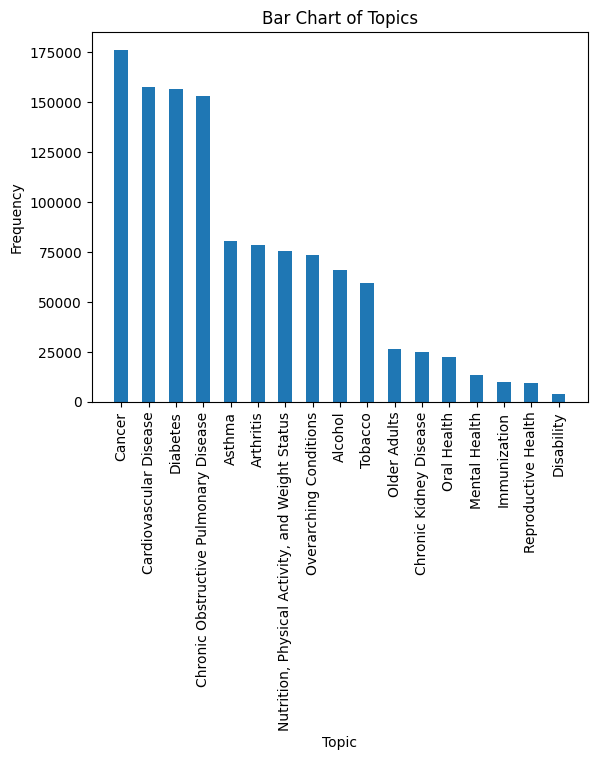

In [ ]:
cditopic = cdi_data['Topic'].value_counts().index
cditopiccount = cdi_data['Topic'].value_counts().values
plt.bar(cditopic, cditopiccount, width = 0.5)
plt.xlabel("Topic")
plt.ylabel("Frequency")
plt.title("Bar Chart of Topics")
plt.xticks(rotation = 90)
plt.show()

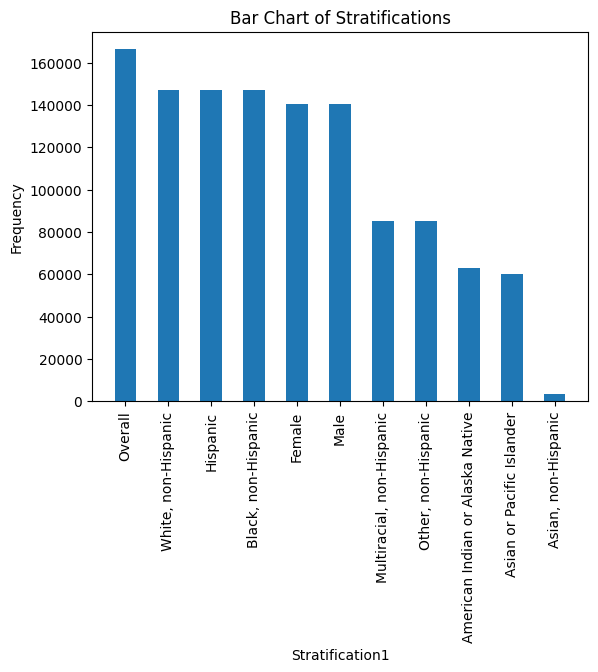

In [ ]:
cdistratification = cdi_data['Stratification1'].value_counts().index
cdistratificationcount = cdi_data['Stratification1'].value_counts().values
plt.bar(cdistratification, cdistratificationcount, width = 0.5)
plt.xlabel("Stratification1")
plt.ylabel("Frequency")
plt.title("Bar Chart of Stratifications")
plt.xticks(rotation = 90)
plt.show()

## Analysis of different diseases

In [ ]:
uploaded = files.upload()

Saving Screenshot 2023-12-15 at 2.25.43 AM.png to Screenshot 2023-12-15 at 2.25.43 AM.png


The dataset from “U.S. Chronic Disease Indicators (CDI)” presents that Cancer was the leader age-adjusted prevalence among all CDI topics by a significant margin, followed by Cardiovascular Diseases and Diabetes


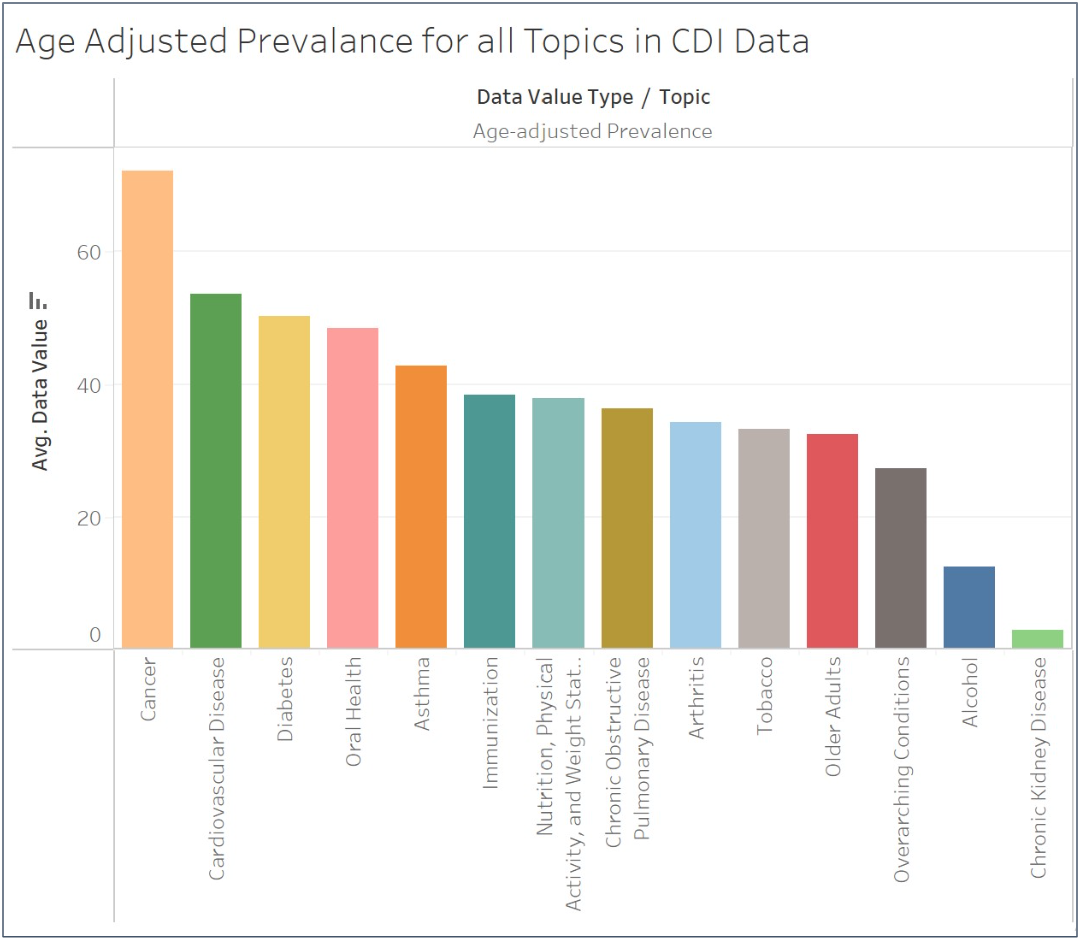

In [ ]:
Image("Screenshot 2023-12-15 at 2.25.43 AM.png")

### Asthma Graphs and Analysis

In [ ]:
asthma_data = cleaned_dataset_1[cleaned_dataset_1['Topic'] == 'Asthma']
asthma_data.head(10)

Unnamed: 0  YearStart  YearEnd LocationAbbr LocationDesc DataSource  \
107         107       2016     2016           AR     Arkansas  SEDD; SID   
108         108       2017     2017           AZ      Arizona  SEDD; SID   
109         109       2016     2016           CA   California  SEDD; SID   
110         110       2015     2015           CO     Colorado  SEDD; SID   
111         111       2017     2017           CO     Colorado  SEDD; SID   
112         112       2014     2014           CT  Connecticut  SEDD; SID   
113         113       2016     2016           DE     Delaware  SEDD; SID   
114         114       2014     2014           FL      Florida  SEDD; SID   
115         115       2016     2016           FL      Florida  SEDD; SID   
116         116       2017     2017           FL      Florida  SEDD; SID   

      Topic                                    Question     DataValueUnit  \
107  Asthma  Emergency department visit rate for asthma               NaN   
108  Asthma  Emergency department visit rate for asthma               NaN   
109  Asthma  Emergency department visit rate for asthma               NaN   
110  Asthma  Emergency department visit rate for asthma               NaN   
111  Asthma  Emergency department visit rate for asthma               NaN   
112  Asthma  Emergency department visit rate for asthma               NaN   
113  Asthma  Emergency department visit rate for asthma               NaN   
114  Asthma  Emergency department visit rate for asthma               NaN   
115  Asthma  Emergency department visit rate for asthma               NaN   
116  Asthma  Emergency department visit rate for asthma  cases per 10,000   

         DataValueType DataValue  DataValueAlt DataValueFootnoteSymbol  \
107             Number      5285       5285.00                     NaN   
108             Number     13497      13497.00                     NaN   
109             Number       NaN           NaN                       -   
110             Number       NaN           NaN                       -   
111             Number       NaN           NaN                       -   
112             Number       NaN           NaN                       -   
113             Number       NaN           NaN                       -   
114             Number    131559     131559.00                     NaN   
115             Number      5751       5751.00                     NaN   
116  Age-adjusted Rate      7.12          7.12                     NaN   

     DatavalueFootnote  LowConfidenceLimit  HighConfidenceLimit  \
107                NaN                 NaN                  NaN   
108                NaN                 NaN                  NaN   
109  No data available                 NaN                  NaN   
110  No data available                 NaN                  NaN   
111  No data available                 NaN                  NaN   
112  No data available                 NaN                  NaN   
113  No data available                 NaN                  NaN   
114                NaN                 NaN                  NaN   
115                NaN                 NaN                  NaN   
116                NaN                6.90                 7.35   

    StratificationCategory1      Stratification1  \
107                  Gender                 Male   
108                  Gender                 Male   
109          Race/Ethnicity  Black, non-Hispanic   
110          Race/Ethnicity             Hispanic   
111                  Gender                 Male   
112          Race/Ethnicity             Hispanic   
113                  Gender               Female   
114                 Overall              Overall   
115          Race/Ethnicity  Black, non-Hispanic   
116          Race/Ethnicity             Hispanic   

                                        GeoLocation  
107    POINT (-92.27449074299966 34.74865012400045)  
108  POINT (-111.76381127699972 34.865970280000454)  
109   POINT (-120.99999953799971

#### Asthma Vaccination Prevalence

In [ ]:
import plotly.express as px
import pandas as pd

asthma_data_copy = asthma_data.copy()
asthma_data_copy.loc[:, 'DataValue'] = pd.to_numeric(asthma_data_copy['DataValue'], errors='coerce')

question_order = [
    "Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma",
    "Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma",
    "Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with asthma",
    "Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with asthma"
]

filtered_asthma_data = asthma_data_copy[
    (asthma_data_copy['Question'].isin(question_order)) &
    (asthma_data_copy['DataValueType'] == "Age-adjusted Prevalence") &
    (asthma_data_copy['DataValueUnit'] == "%")
]

average_prevalence = filtered_asthma_data.groupby('Question')['DataValue'].mean().reset_index()

average_prevalence['Question'] = pd.Categorical(average_prevalence['Question'], categories=question_order, ordered=True)
average_prevalence = average_prevalence.sort_values('Question')

color_map = {
    "Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma": "yellow",
    "Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma": "red",
    "Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with asthma": "magenta",
    "Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with asthma": "brown"
}

fig = px.bar(
    average_prevalence,
    x='Question',
    y='DataValue',
    color='Question',
    color_discrete_map=color_map,
    hover_data={'Question': True, 'DataValue': ':.2f'}
)


fig.update_layout(
    title='Higher coverage of Influenza and Pneumococcal Vaccination can further lower the Asthma Prevalence in Adults 18-64 years Age',
    xaxis_title='',
    yaxis_title='Average Age-adjusted Prevalence (%)',
    template='plotly_white',
    width=1200,
    height=800,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.3,
        xanchor="center",
        x=0.5
    ),
    margin=dict(t=150, l=100, r=100, b=100)
)

fig.update_xaxes(showticklabels=False)

fig.show()


#### Asthma Prevalence Adults - Women

In [ ]:
import plotly.express as px
import pandas as pd

asthma_data_copy = asthma_data.copy()
asthma_data_copy.loc[:, 'DataValue'] = pd.to_numeric(asthma_data_copy['DataValue'], errors='coerce')

question_order = [
    "Asthma prevalence among women aged 18-44 years",
    "Current asthma prevalence among adults aged >= 18 years"
]

filtered_asthma_data = asthma_data_copy[
    (asthma_data_copy['Question'].isin(question_order)) &
    (asthma_data_copy['DataValueType'] == "Crude Prevalence") &
    (asthma_data_copy['DataValueUnit'] == "%")
]

average_prevalence = filtered_asthma_data.groupby('Question')['DataValue'].mean().reset_index()

average_prevalence['Question'] = pd.Categorical(average_prevalence['Question'], categories=question_order, ordered=True)
average_prevalence = average_prevalence.sort_values('Question')

color_map = {
    "Asthma prevalence among women aged 18-44 years": "green",
    "Current asthma prevalence among adults aged >= 18 years": "light green"
}

fig = px.bar(
    average_prevalence,
    x='Question',
    y='DataValue',
    color='Question',
    color_discrete_map=color_map,
    hover_data={'Question': True, 'DataValue': ':.2f'}
)


fig.update_layout(
    title='Asthma Prevalence Rate Higher among Women',
    xaxis_title='',
    yaxis_title='Average Crude Prevalence (%)',
    template='plotly_white',
    width=1200,
    height=800,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.1,
        xanchor="center",
        x=0.5
    ),
    margin=dict(t=150, l=100, r=100, b=100)
)

fig.update_xaxes(showticklabels=False)

fig.show()

#### Asthma Emergency Department Visits

In [ ]:
import plotly.express as px
import pandas as pd

asthma_data_copy = asthma_data.copy()
asthma_data_copy.loc[:, 'DataValue'] = pd.to_numeric(asthma_data_copy['DataValue'], errors='coerce')

question_order = [
    "Emergency department visit rate for asthma",
    "Hospitalizations for asthma"
]

filtered_asthma_data = asthma_data_copy[
    (asthma_data_copy['Question'].isin(question_order)) &
    (asthma_data_copy['DataValueType'] == "Age-adjusted Rate") &
    (asthma_data_copy['DataValueUnit'] == "cases per 10,000")
]

average_prevalence = filtered_asthma_data.groupby('Question')['DataValue'].mean().reset_index()

average_prevalence['Question'] = pd.Categorical(average_prevalence['Question'], categories=question_order, ordered=True)
average_prevalence = average_prevalence.sort_values('Question')

color_map = {
    "Emergency department visit rate for asthma": "blue",
    "Hospitalizations for asthma": "orange"
}

fig = px.bar(
    average_prevalence,
    x='Question',
    y='DataValue',
    color='Question',
    color_discrete_map=color_map,
    hover_data={'Question': True, 'DataValue': ':.2f'}
)


fig.update_layout(
    title='Higher Emergency Department visit for Asthma Patients - 55, Age Adjusted Cases per 10,000',
    xaxis_title='',
    yaxis_title='Age adjusted Cases per 10,000',
    template='plotly_white',
    width=1200,
    height=800,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.1,
        xanchor="center",
        x=0.5
    ),
    margin=dict(t=150, l=100, r=100, b=100)
)

fig.update_xaxes(showticklabels=False)

fig.show()

#### Asthma Mortality Rate

In [ ]:
import plotly.express as px
import pandas as pd

asthma_data_copy = asthma_data.copy()
asthma_data_copy.loc[:, 'DataValue'] = pd.to_numeric(asthma_data_copy['DataValue'], errors='coerce')

question_order = [
    "Asthma mortality rate"
]

filtered_asthma_data = asthma_data_copy[
    (asthma_data_copy['Question'].isin(question_order)) &
    (asthma_data_copy['DataValueType'] == "Age-adjusted Rate") &
    (asthma_data_copy['DataValueUnit'] == "cases per 1,000,000")
]

average_prevalence = filtered_asthma_data.groupby('Question')['DataValue'].mean().reset_index()

average_prevalence['Question'] = pd.Categorical(average_prevalence['Question'], categories=question_order, ordered=True)
average_prevalence = average_prevalence.sort_values('Question')

color_map = {
    "Asthma mortality rate": "orange"
}

fig = px.bar(
    average_prevalence,
    x='Question',
    y='DataValue',
    color='Question',
    color_discrete_map=color_map,
    hover_data={'Question': True, 'DataValue': ':.2f'}
)


fig.update_layout(
    title='Asthma Mortality Rate Low at 12 per Million cases or 1.2 per 100,000 which is 1% of CVD or Cancer',
    xaxis_title='',
    yaxis_title='Age adjusted Cases per 1,000,000',
    template='plotly_white',
    width=1200,
    height=800,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.1,
        xanchor="center",
        x=0.5
    ),
    margin=dict(t=150, l=100, r=100, b=100)
)

fig.update_xaxes(showticklabels=False)

fig.show()

### Chronic Kidney Disease Graphs and Analysis

In [ ]:
ckd_data = cleaned_dataset_1[cleaned_dataset_1['Topic'] == 'Chronic Kidney Disease']
ckd_data.head(10)

Unnamed: 0  YearStart  YearEnd LocationAbbr LocationDesc DataSource  \
1109        1109       2012     2012           AK       Alaska       NVSS   
1110        1110       2016     2016           AK       Alaska       NVSS   
1111        1111       2018     2018           AK       Alaska       NVSS   
1112        1112       2010     2010           AL      Alabama       NVSS   
1113        1113       2017     2017           AL      Alabama       NVSS   
1114        1114       2018     2018           AL      Alabama       NVSS   
1115        1115       2020     2020           AR     Arkansas       NVSS   
1116        1116       2017     2017           AR     Arkansas       NVSS   
1117        1117       2020     2020           CA   California       NVSS   
1118        1118       2010     2010           CO     Colorado       NVSS   

                       Topic                                Question  \
1109  Chronic Kidney Disease  Mortality with end-stage renal disease   
1110  Chronic Kidney Disease  Mortality with end-stage renal disease   
1111  Chronic Kidney Disease  Mortality with end-stage renal disease   
1112  Chronic Kidney Disease  Mortality with end-stage renal disease   
1113  Chronic Kidney Disease  Mortality with end-stage renal disease   
1114  Chronic Kidney Disease  Mortality with end-stage renal disease   
1115  Chronic Kidney Disease  Mortality with end-stage renal disease   
1116  Chronic Kidney Disease  Mortality with end-stage renal disease   
1117  Chronic Kidney Disease  Mortality with end-stage renal disease   
1118  Chronic Kidney Disease  Mortality with end-stage renal disease   

     DataValueUnit DataValueType DataValue  DataValueAlt  \
1109           NaN        Number       194        194.00   
1110           NaN        Number       142        142.00   
1111           NaN        Number        20         20.00   
1112           NaN        Number      2138       2138.00   
1113           NaN        Number      1801       1801.00   
1114           NaN        Number      1712       1712.00   
1115           NaN        Number        29         29.00   
1116           NaN        Number      1981       1981.00   
1117           NaN        Number     16941      16941.00   
1118           NaN        Number       137        137.00   

     DataValueFootnoteSymbol DatavalueFootnote  LowConfidenceLimit  \
1109                     NaN               NaN                 NaN   
1110                     NaN               NaN                 NaN   
1111                     NaN               NaN                 NaN   
1112                     NaN               NaN                 NaN   
1113                     NaN               NaN                 NaN   
1114                     NaN               NaN                 NaN   
1115                     NaN               NaN                 NaN   
1116                     NaN               NaN                 NaN   
1117                     NaN               NaN                 NaN   
1118                     NaN               NaN                 NaN   

      HighConfidenceLimit StratificationCategory1            Stratification1  \
1109                  NaN                  Gender                       Male   
1110                  NaN                  Gender                       Male   
1111                  NaN          Race/Ethnicity  Asian or Pacific Islander   
1112                  NaN                  Gender                     Female   
1113                  NaN                  Gender                       Male   
1114                  NaN                  Gender                     Female   
1115                  NaN          Race/Ethnicity  Asian or Pacific Islander   
1116                  NaN          Race/Ethnicity        White, non-Hispanic   
1117                  NaN                  Gender                       Male   
1118                  NaN          Race/Ethnicity        Black, non-Hispanic   

                                         GeoLocation

#### Chronic Kidney Disease Prevalence

In [ ]:
import plotly.express as px
import pandas as pd

ckd_data_copy = ckd_data.copy()
ckd_data_copy['DataValue'] = pd.to_numeric(ckd_data_copy['DataValue'], errors='coerce')

question_order = [
    "Prevalence of chronic kidney disease among adults aged >= 18 years"
]

year_range = ckd_data['YearEnd'].unique()

filtered_ckd_data = ckd_data_copy[
    (ckd_data_copy['Question'].isin(question_order)) &
    (ckd_data_copy['DataValueType'] == "Age-adjusted Prevalence") &
    (ckd_data_copy['DataValueUnit'] == "%") &
    (ckd_data_copy['YearEnd'].isin(year_range))
]

average_prevalence = filtered_ckd_data.groupby('YearEnd')['DataValue'].mean().reset_index()

average_prevalence['DataValueType'] = "Age-adjusted Prevalence"
average_prevalence['DataValueUnit'] = "%"
average_prevalence['Question'] = "Prevalence of chronic kidney disease among adults aged >= 18 years"

fig = px.line(
    average_prevalence,
    x='YearEnd',
    y='DataValue',
    markers=True,
    hover_name='YearEnd',
    hover_data={
        'DataValueType': False,
        'DataValueUnit': False,
        'Question': True,
        'YearEnd': True,
        'DataValue': ':.2f'
    }
)

fig.update_traces(
    hovertemplate="<b>Year End:</b> %{x}<br>" +
    "<b>Avg. Data Value:</b> %{y:.2f}%<br>" +
    "<b>Question:</b> %{customdata[2]}<br>"
)


fig.update_layout(
    title='Prevalence of Chronic Kidney Disease (CKD) among adults aged >= 18 years is continuously increasing and is correlated with <br>Diabetes increase',
    xaxis_title='Year End',
    yaxis_title='Average Prevalence %',
    template='plotly_white',
    width=1200,
    height=800,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.1,
        xanchor="center",
        x=0.5
    ),
    margin=dict(t=100, l=100, r=100, b=100)
)


fig.update_xaxes(showticklabels=True)

fig.show()

#### Chronic Kidney Disease - Mortality

In [ ]:
import plotly.express as px
import pandas as pd

ckd_data_copy = ckd_data.copy()
ckd_data_copy['DataValue'] = pd.to_numeric(ckd_data_copy['DataValue'], errors='coerce')

question_order = [
    "Mortality with end-stage renal disease"
]

year_range = ckd_data['YearEnd'].unique()

filtered_ckd_data = ckd_data_copy[
    (ckd_data_copy['Question'].isin(question_order)) &
    (ckd_data_copy['DataValueType'] == "Age-adjusted Rate") &
    (ckd_data_copy['DataValueUnit'] == "cases per 100,000") &
    (ckd_data_copy['YearEnd'].isin(year_range))
]

average_prevalence = filtered_ckd_data.groupby('YearEnd')['DataValue'].mean().reset_index()

average_prevalence['DataValueType'] = "Age-adjusted Rate"
average_prevalence['DataValueUnit'] = "cases per 100,000"
average_prevalence['Question'] = "Mortality with end-stage renal disease"

fig = px.line(
    average_prevalence,
    x='YearEnd',
    y='DataValue',
    markers=True,
    hover_name='YearEnd',
    hover_data={
        'DataValueType': False,
        'DataValueUnit': False,
        'Question': True,
        'YearEnd': True,
        'DataValue': ':.2f'
    }
)

fig.update_traces(
    hovertemplate="<b>Year End:</b> %{x}<br>" +
    "<b>Avg. Data Value:</b> %{y:.2f}<br>" +
    "<b>Question:</b> %{customdata[2]}<br>"
)


fig.update_layout(
    title='Prevalence of Chronic Kidney Disease (CKD) among adults aged >= 18 years is continuously increasing and is correlated with <br>Diabetes increase',
    xaxis_title='Year End',
    yaxis_title='Average CKD Mortality cases per 100,00',
    template='plotly_white',
    width=1200,
    height=800,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.1,
        xanchor="center",
        x=0.5
    ),
    margin=dict(t=100, l=100, r=100, b=100)
)


fig.update_xaxes(showticklabels=True)

fig.show()

#### Chronic Kidney Disease - End Stage

In [ ]:
import plotly.express as px
import pandas as pd

# Assuming ckd_data is your original DataFrame
ckd_data_copy = ckd_data.copy()
ckd_data_copy['DataValue'] = pd.to_numeric(ckd_data_copy['DataValue'], errors='coerce')

question_order = [
    "Incidence of treated end-stage renal disease",
    "Incidence of treated end-stage renal disease attributed to diabetes"
]

year_range = ckd_data_copy['YearEnd'].unique()

# Adjusted to filter based on each category
partition_conditions = [
    ("Incidence of treated end-stage renal disease", "Number"),
    ("Incidence of treated end-stage renal disease", "Adjusted by age, sex, race and ethnicity"),
    ("Incidence of treated end-stage renal disease attributed to diabetes", "Number"),
    ("Incidence of treated end-stage renal disease attributed to diabetes", "Adjusted by age, sex, race and ethnicity")
]

frames = []

for question, data_value_type in partition_conditions:
    filtered_ckd_data = ckd_data_copy[
        (ckd_data_copy['Question'] == question) &
        (ckd_data_copy['DataValueType'] == data_value_type) &
        (ckd_data_copy['YearEnd'].isin(year_range))
    ]

    average_prevalence = filtered_ckd_data.groupby('YearEnd')['DataValue'].mean().reset_index()
    average_prevalence['DataValueType'] = data_value_type
    average_prevalence['Question'] = question

    frames.append(average_prevalence)

combined_data = pd.concat(frames)

# Plotting the data
fig = px.line(
    combined_data,
    x='YearEnd',
    y='DataValue',
    color='Question',
    line_dash='DataValueType',
    markers=True,
    hover_data={
        'YearEnd': True,
        'DataValue': ':.2f',
        'DataValueType': True,
        'Question': True
    }
)

# Update the layout and axes
fig.update_layout(
    title='Incidence of treated end-stage renal disease cases per 1,000,000 growing at an alarming rate',
    xaxis_title='Year End',
    yaxis_title='Average CKD Cases per 1,000,000',
    template='plotly_white',
    width=1200,
    height=800,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.3,
        xanchor="center",
        x=0.3
    ),
    margin=dict(t=100, l=100, r=100, b=100)
)

fig.show()


#### Chronic Kidney Disease - Diabetes

In [ ]:
import plotly.express as px
import pandas as pd

ckd_data_copy = ckd_data.copy()
ckd_data_copy['DataValue'] = pd.to_numeric(ckd_data_copy['DataValue'], errors='coerce')

question_order = [
    "Incidence of treated end-stage renal disease",
    "Incidence of treated end-stage renal disease attributed to diabetes"
]


filtered_ckd_data = ckd_data_copy[
    (ckd_data_copy['Question'].isin(question_order)) &
    (ckd_data_copy['DataValueType'] == "Number") &
    (ckd_data_copy['DataValueUnit'] == "cases per 1,000,000")
]

average_prevalence = filtered_ckd_data.groupby('Question')['DataValue'].mean().reset_index()

average_prevalence['Question'] = pd.Categorical(average_prevalence['Question'], categories=question_order, ordered=True)
average_prevalence = average_prevalence.sort_values('Question')

color_map = {
    "Incidence of treated end-stage renal disease": "blue",
    "Incidence of treated end-stage renal disease attributed to diabetes": "orange"
}

fig = px.bar(
    average_prevalence,
    x='Question',
    y='DataValue',
    color='Question',
    color_discrete_map=color_map,
    hover_data={'Question': True, 'DataValue': ':.2f'}
)


fig.update_layout(
    title='Incidence of treated end-stage renal disease cases per 1,000,000 with Diabetes as the major cause',
    xaxis_title='',
    yaxis_title='Average Cases per 1,000,000',
    template='plotly_white',
    width=1200,
    height=800,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=-0.1,
        xanchor="center",
        x=0.5
    ),
    margin=dict(t=100, l=100, r=100, b=100)
)

fig.update_xaxes(showticklabels=False)

fig.show()

### Cancer Graphs and Analysis

In [ ]:
uploaded = files.upload()

Saving Screenshot 2023-12-14 at 7.41.21 PM.png to Screenshot 2023-12-14 at 7.41.21 PM.png


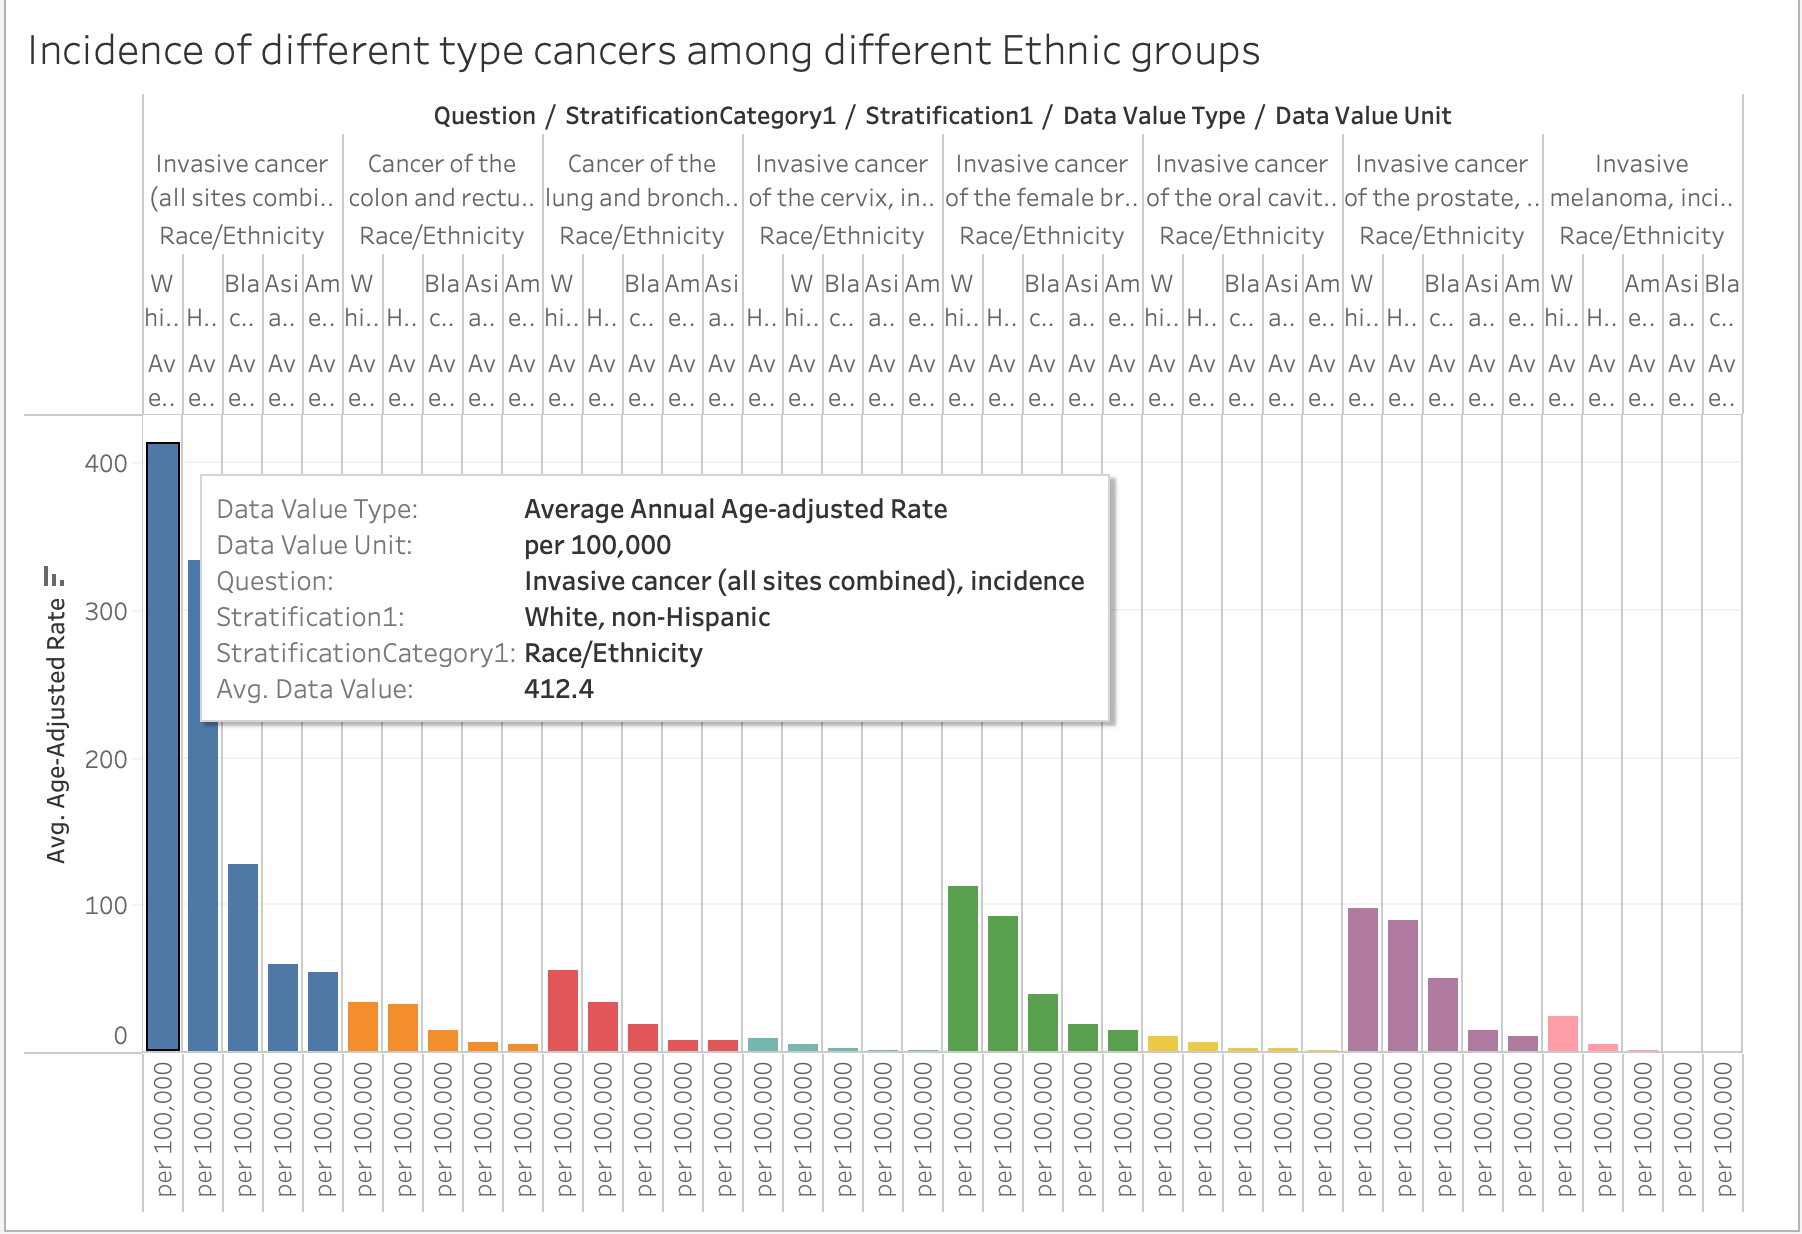

In [ ]:
Image('Screenshot 2023-12-14 at 7.41.21 PM.png')

In [ ]:
uploaded = files.upload()

Saving Screenshot 2023-12-15 at 1.30.56 AM.png to Screenshot 2023-12-15 at 1.30.56 AM.png


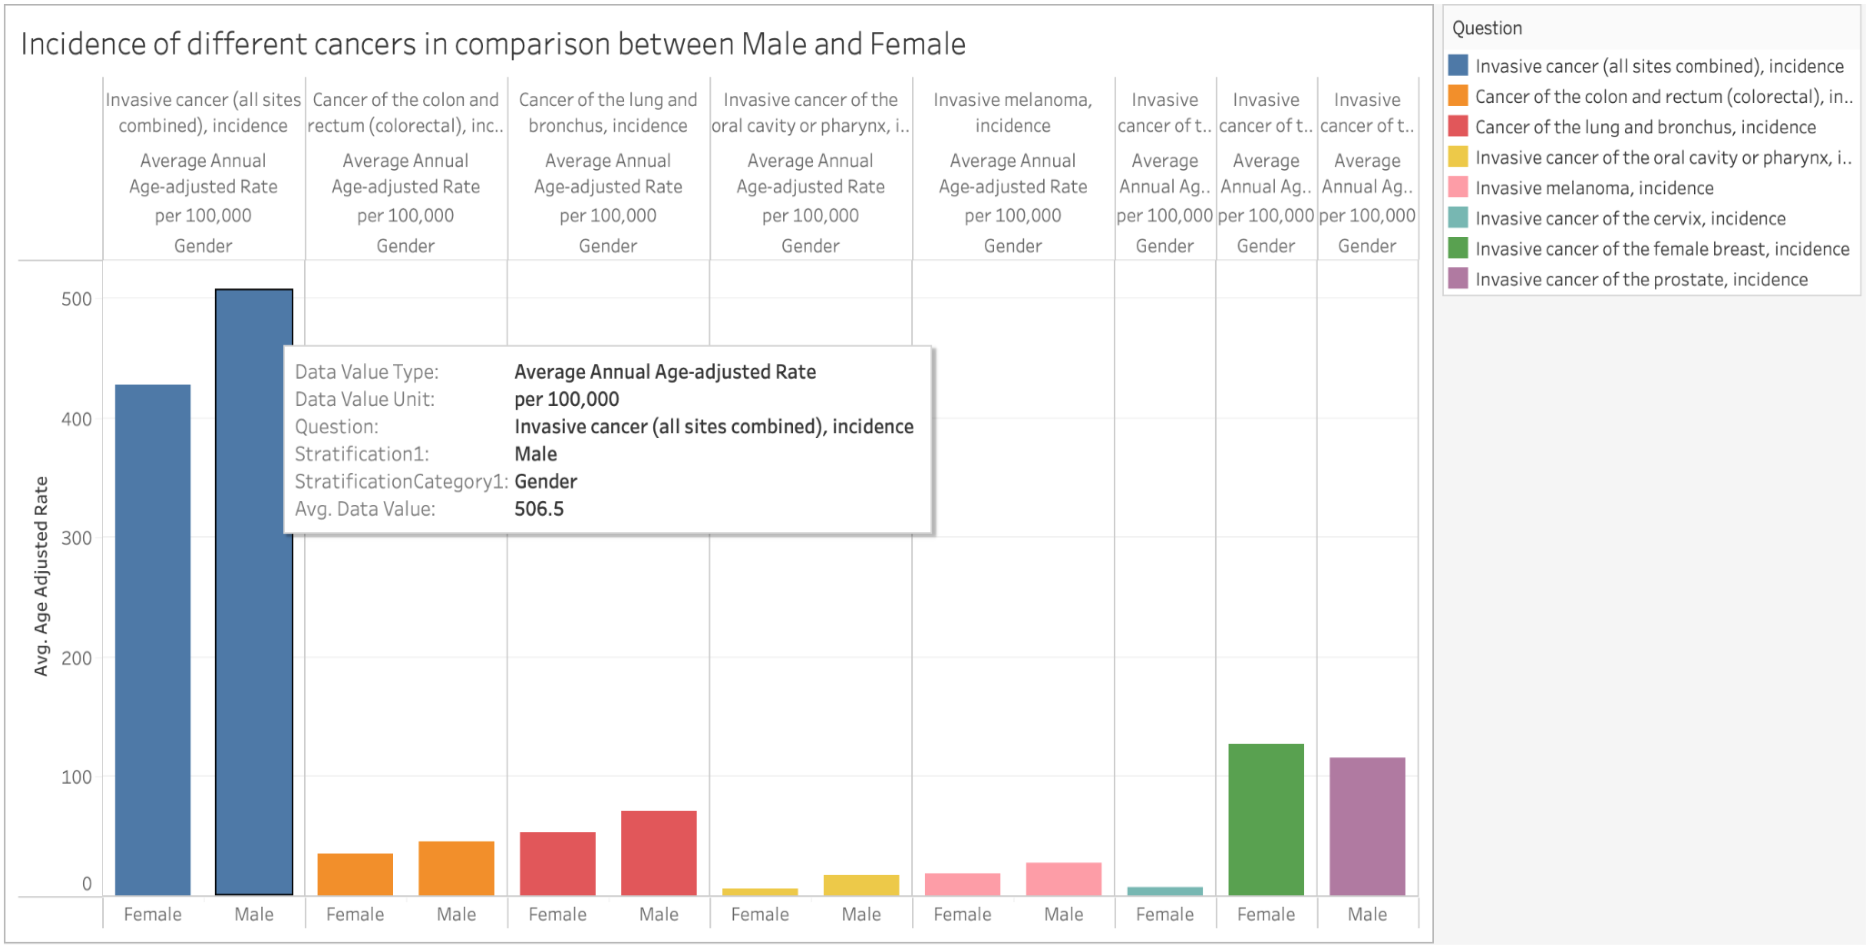

In [ ]:
Image("Screenshot 2023-12-15 at 1.30.56 AM.png")

In [ ]:
uploaded = files.upload()

Saving Screenshot 2023-12-14 at 8.06.28 PM.png to Screenshot 2023-12-14 at 8.06.28 PM.png


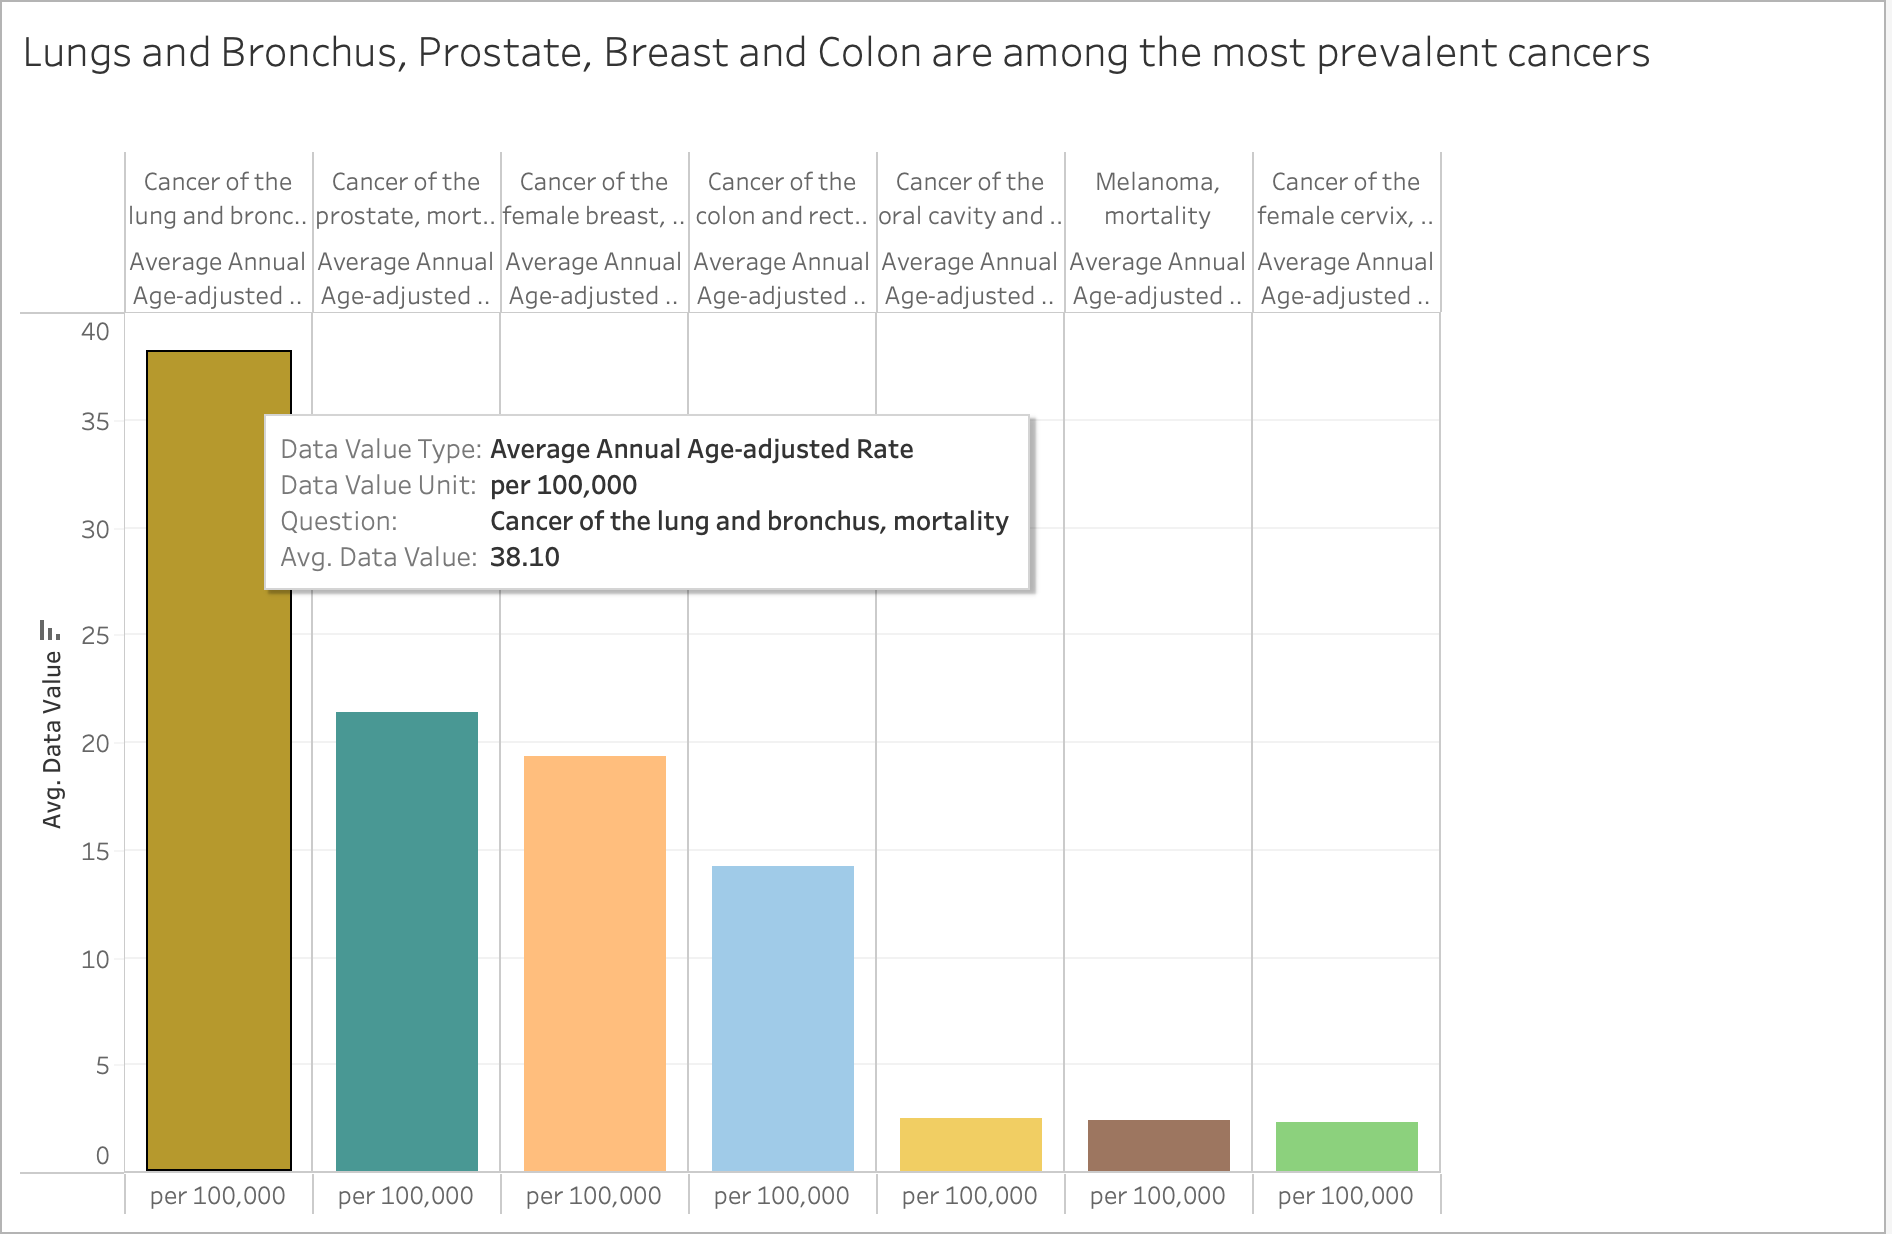

In [ ]:
Image("Screenshot 2023-12-14 at 8.06.28 PM.png")

In [ ]:
uploaded = files.upload()

Saving Screenshot 2023-12-14 at 8.21.39 PM.png to Screenshot 2023-12-14 at 8.21.39 PM (1).png


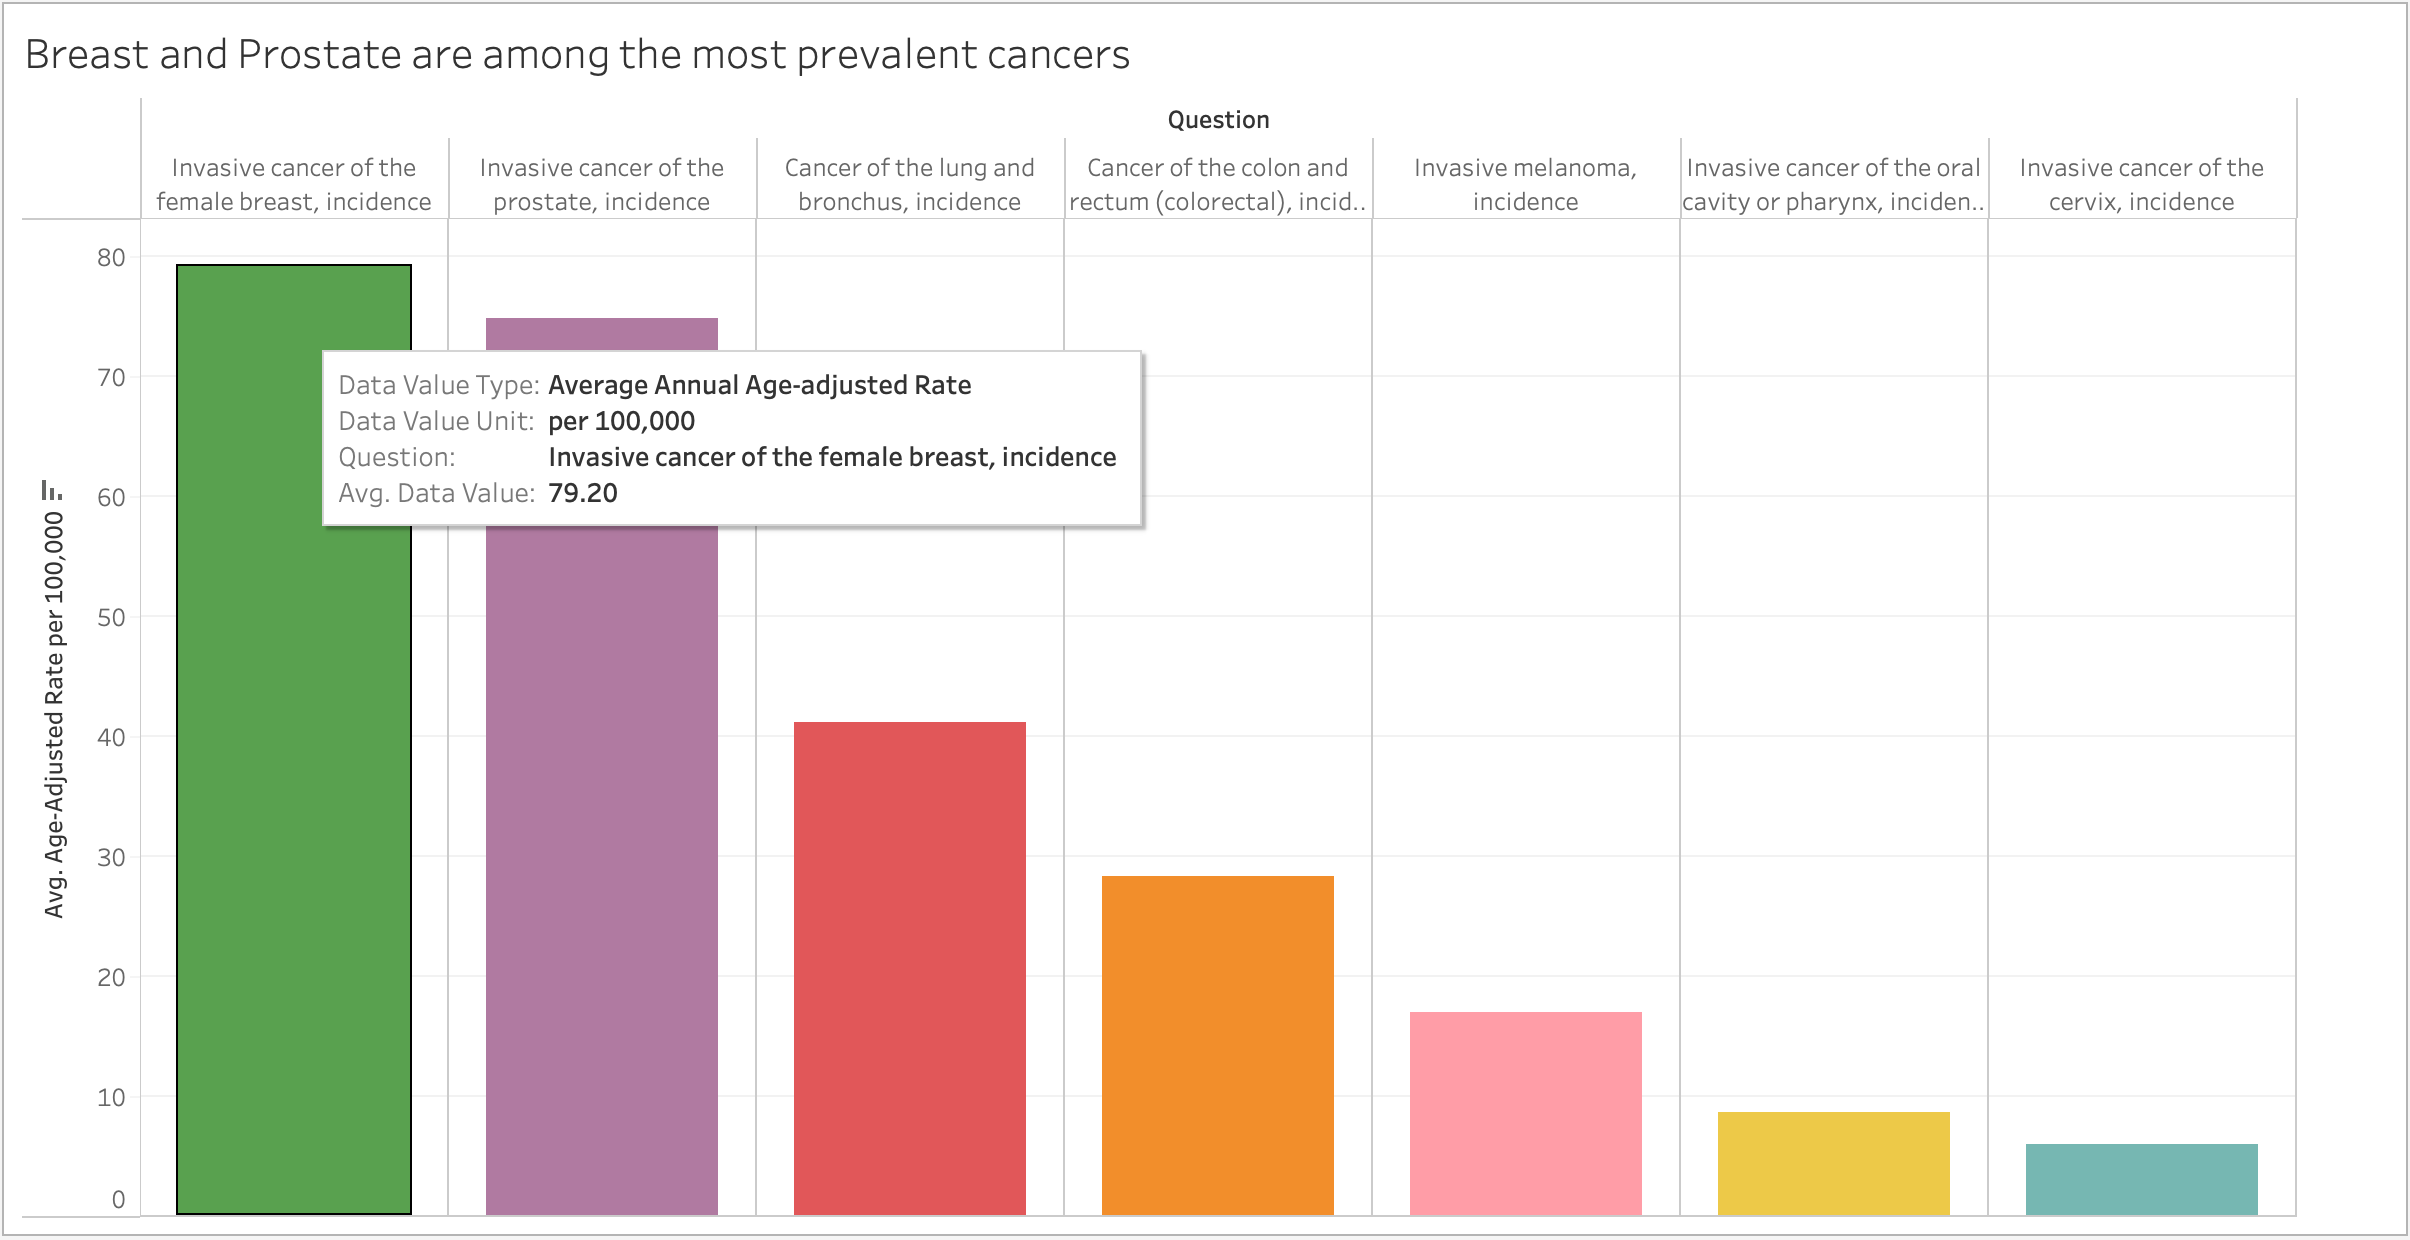

In [ ]:
Image("Screenshot 2023-12-14 at 8.21.39 PM.png")

In [ ]:
uploaded = files.upload()

Saving Screenshot 2023-12-14 at 8.37.04 PM.png to Screenshot 2023-12-14 at 8.37.04 PM.png


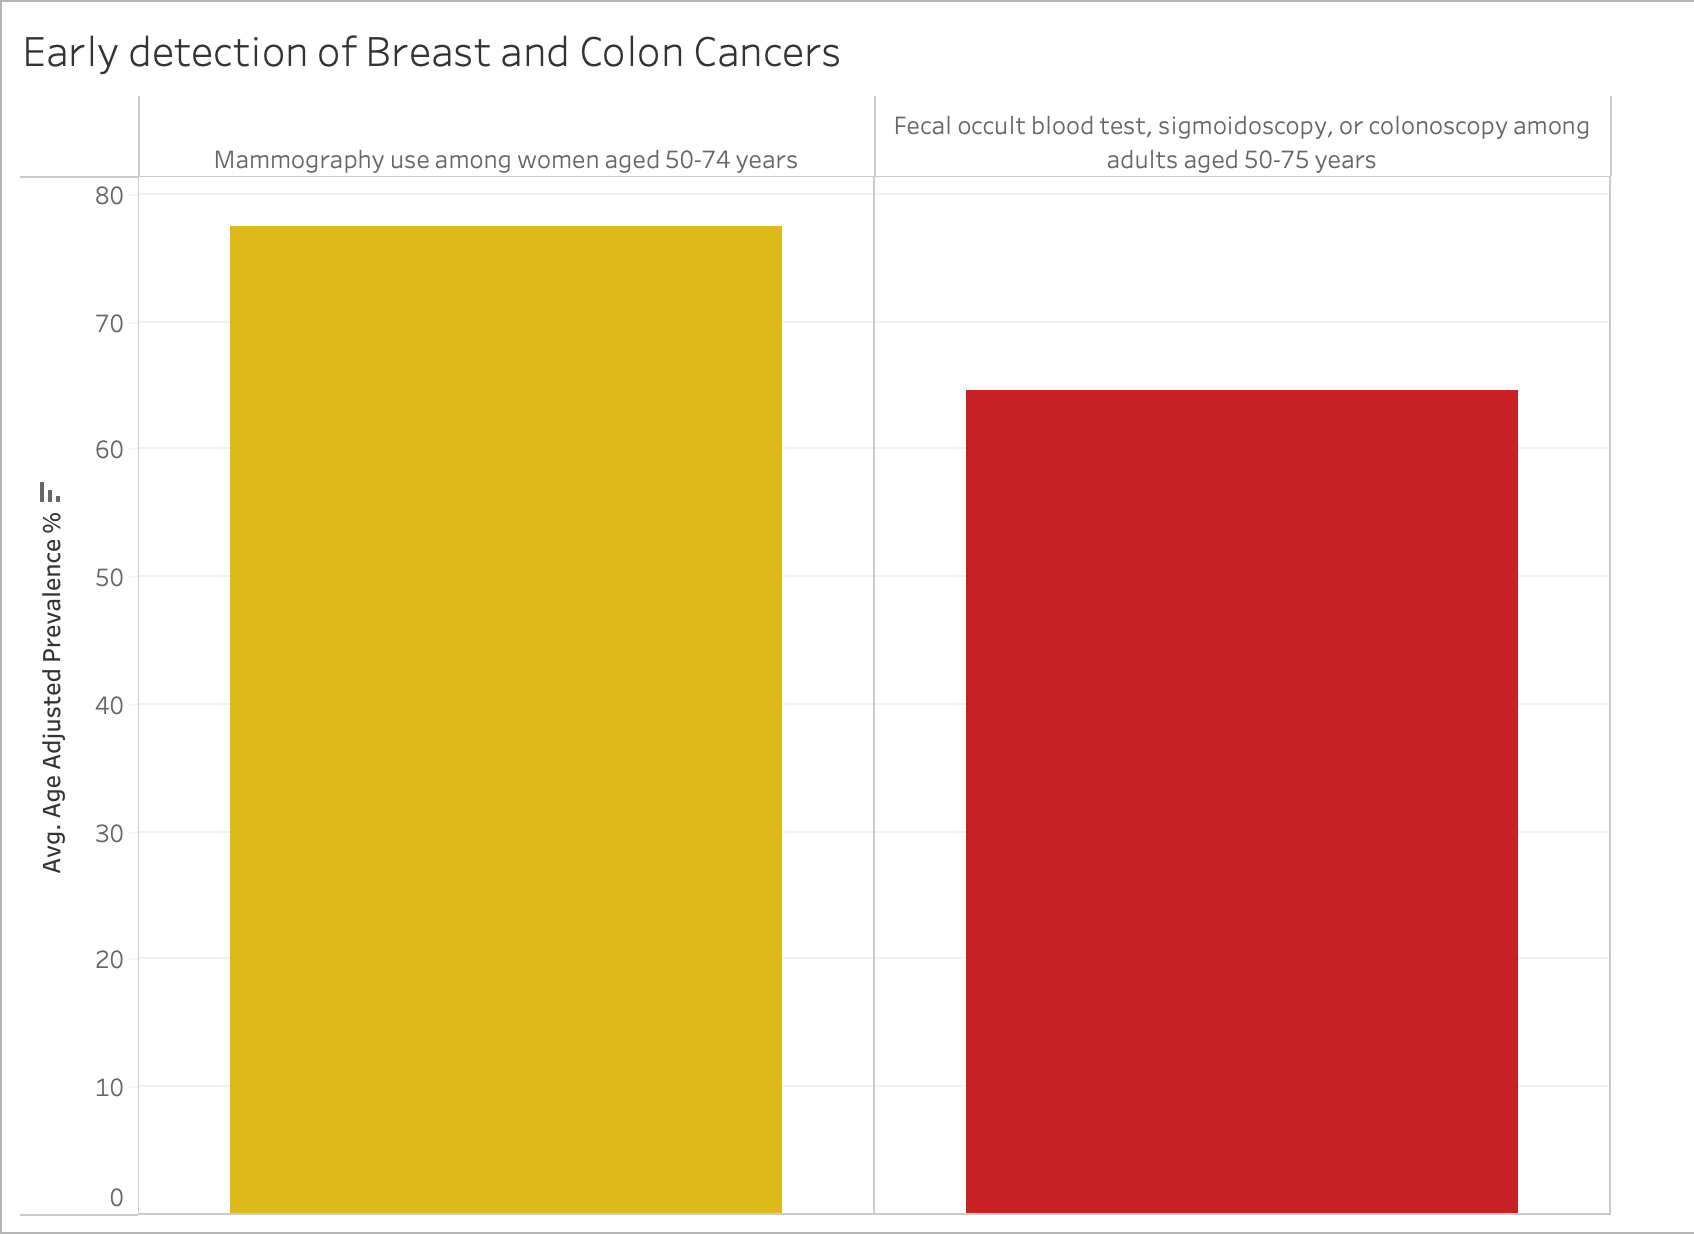

In [ ]:
Image("Screenshot 2023-12-14 at 8.37.04 PM.png")

### Diabetes Graphs and Analysis

In [ ]:
uploaded = files.upload()

Saving Screenshot 2023-12-15 at 1.45.19 AM.png to Screenshot 2023-12-15 at 1.45.19 AM.png


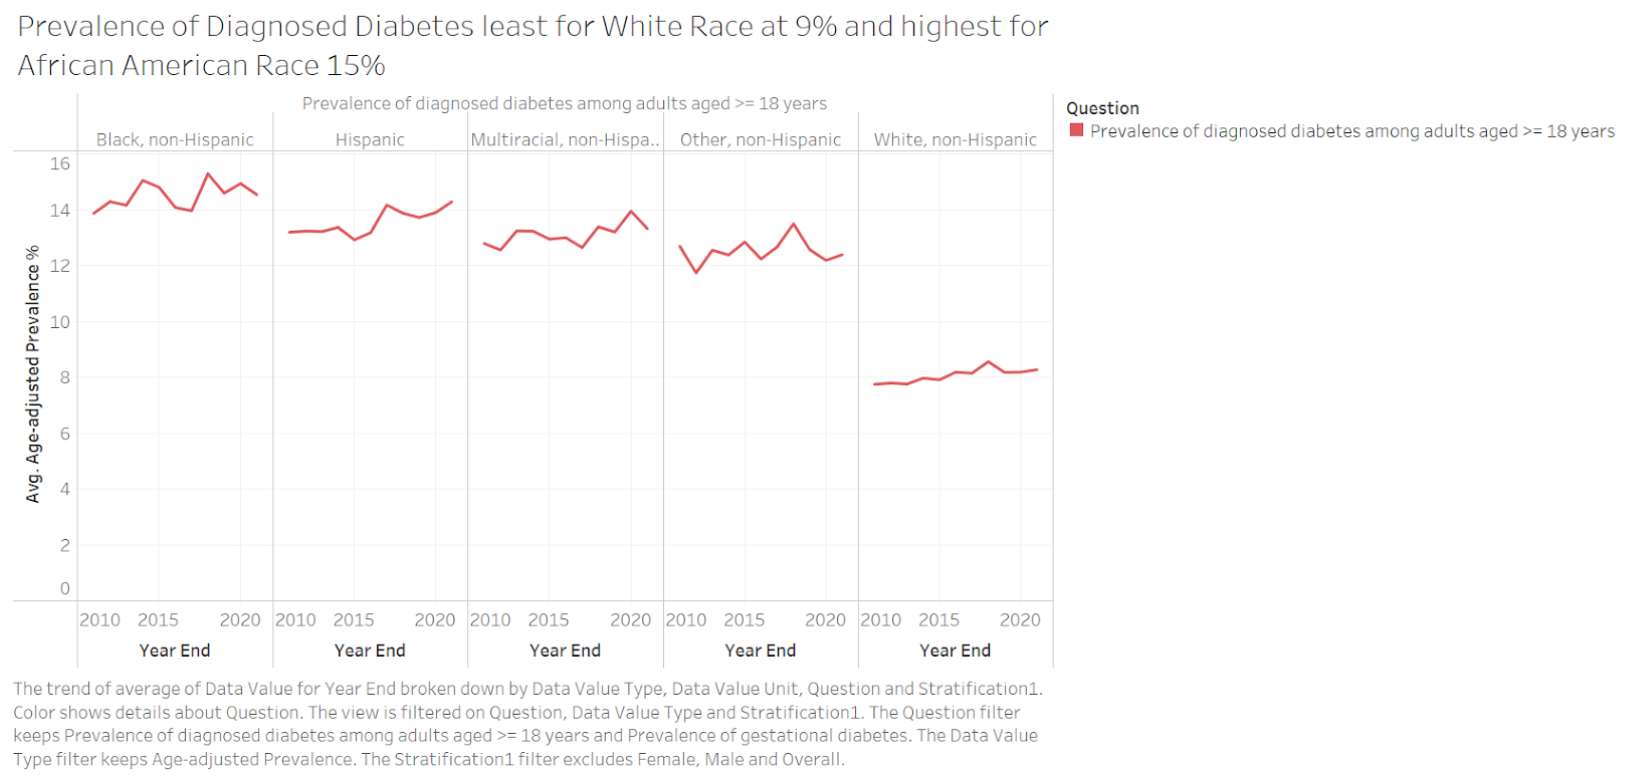

In [ ]:
Image("Screenshot 2023-12-15 at 1.45.19 AM.png")

In [ ]:
uploaded = files.upload()

Saving Screenshot 2023-12-15 at 1.46.03 AM.png to Screenshot 2023-12-15 at 1.46.03 AM.png


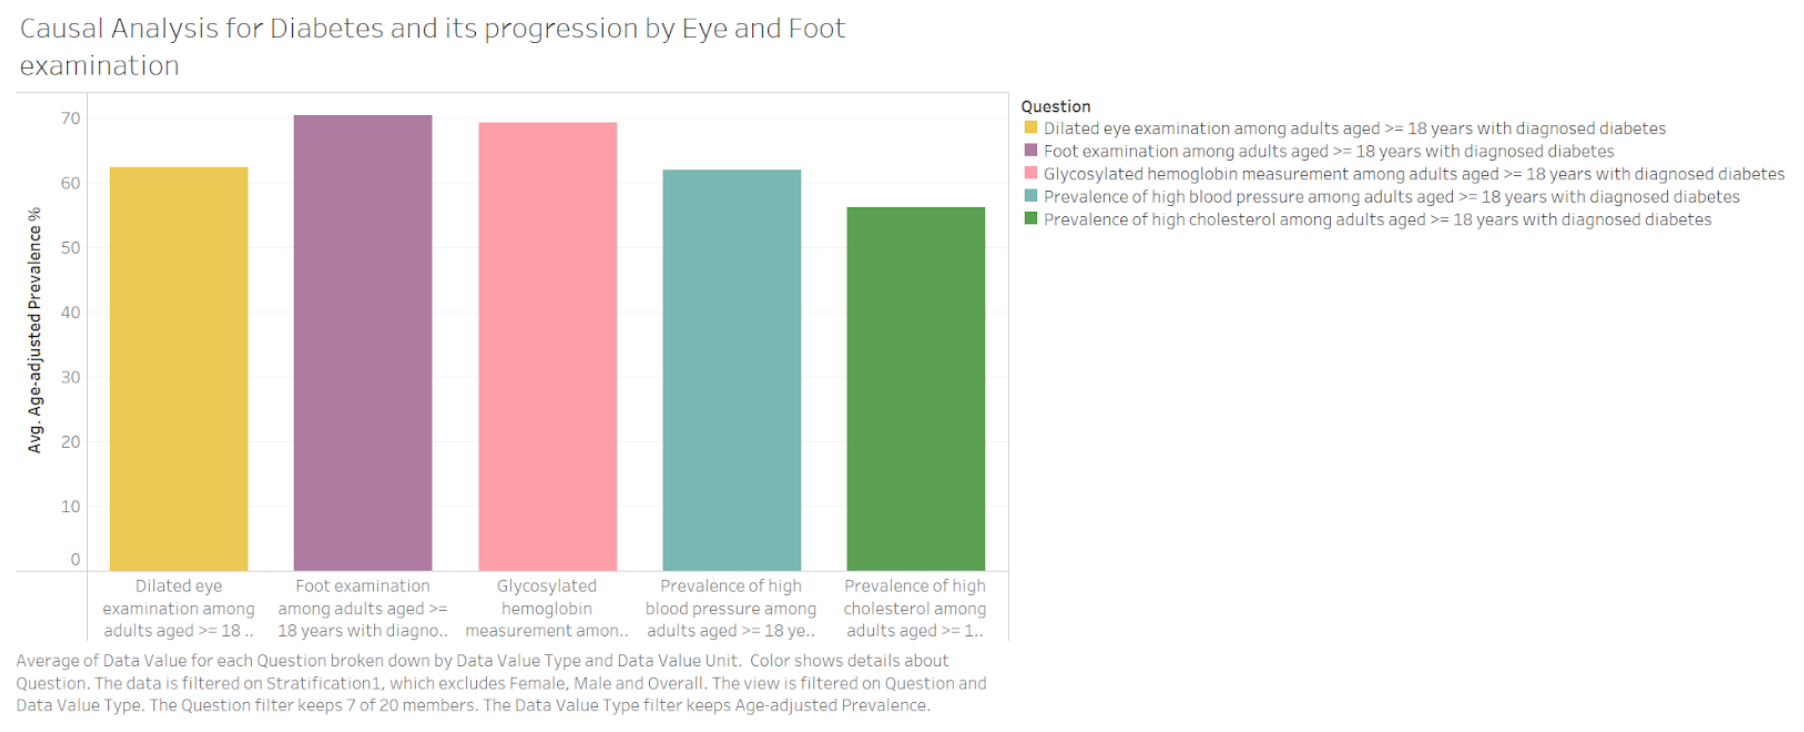

In [ ]:
Image("Screenshot 2023-12-15 at 1.46.03 AM.png")

In [ ]:
uploaded = files.upload()

Saving Screenshot 2023-12-15 at 1.46.51 AM.png to Screenshot 2023-12-15 at 1.46.51 AM.png


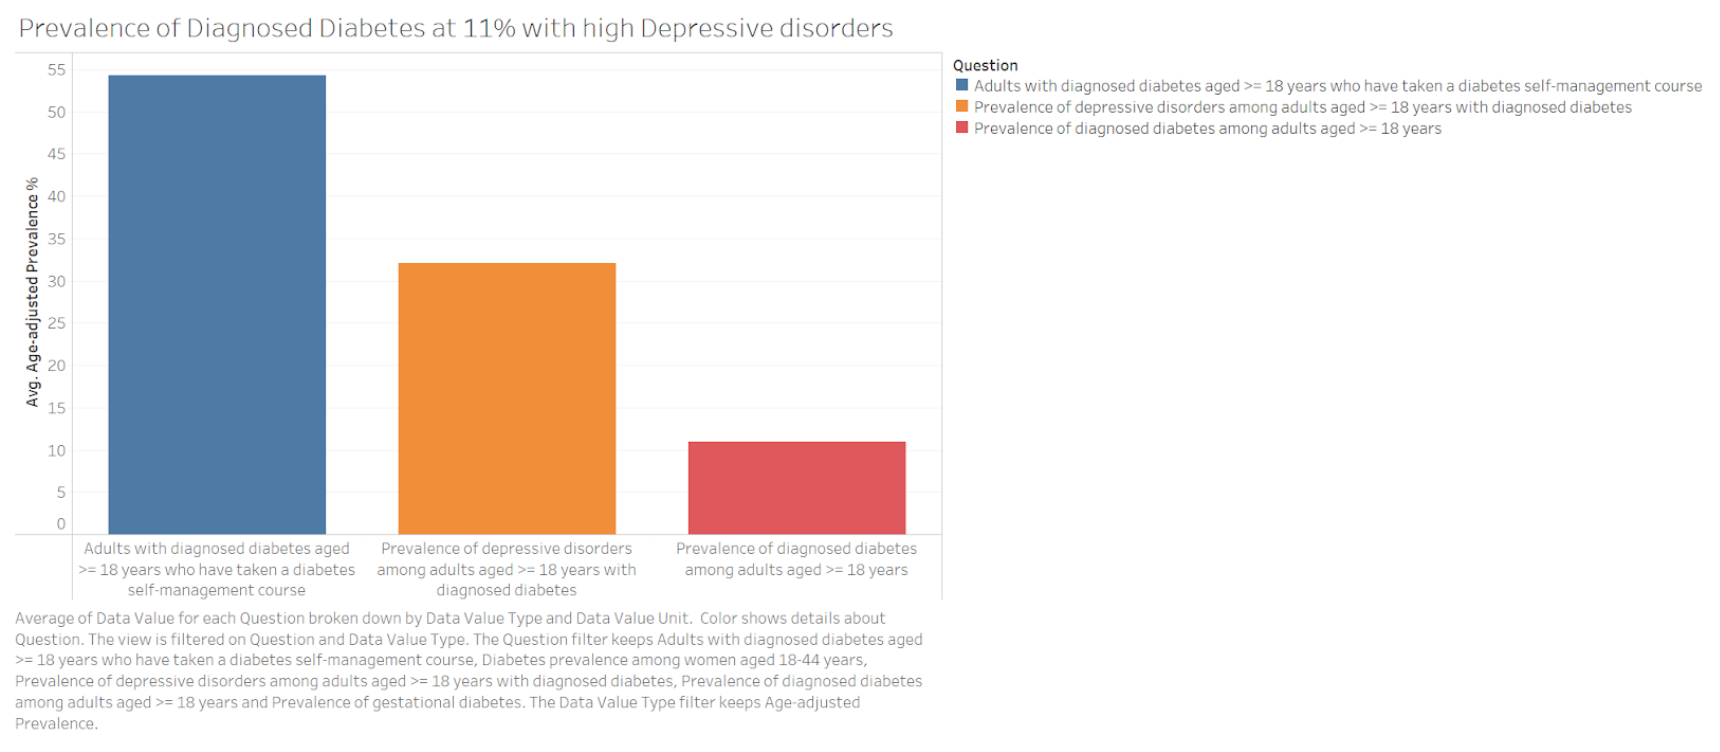

In [ ]:
Image("Screenshot 2023-12-15 at 1.46.51 AM.png")

In [ ]:
uploaded = files.upload()

Saving Screenshot 2023-12-15 at 1.47.30 AM.png to Screenshot 2023-12-15 at 1.47.30 AM.png


In [ ]:
Image("Screenshot 2023-12-15 at 1.47.30 AM.png")

### Arthritis Graphs and Analysis

In [ ]:
uploaded = files.upload()

Saving Arthritis_Disability_High_45%.png to Arthritis_Disability_High_45%.png


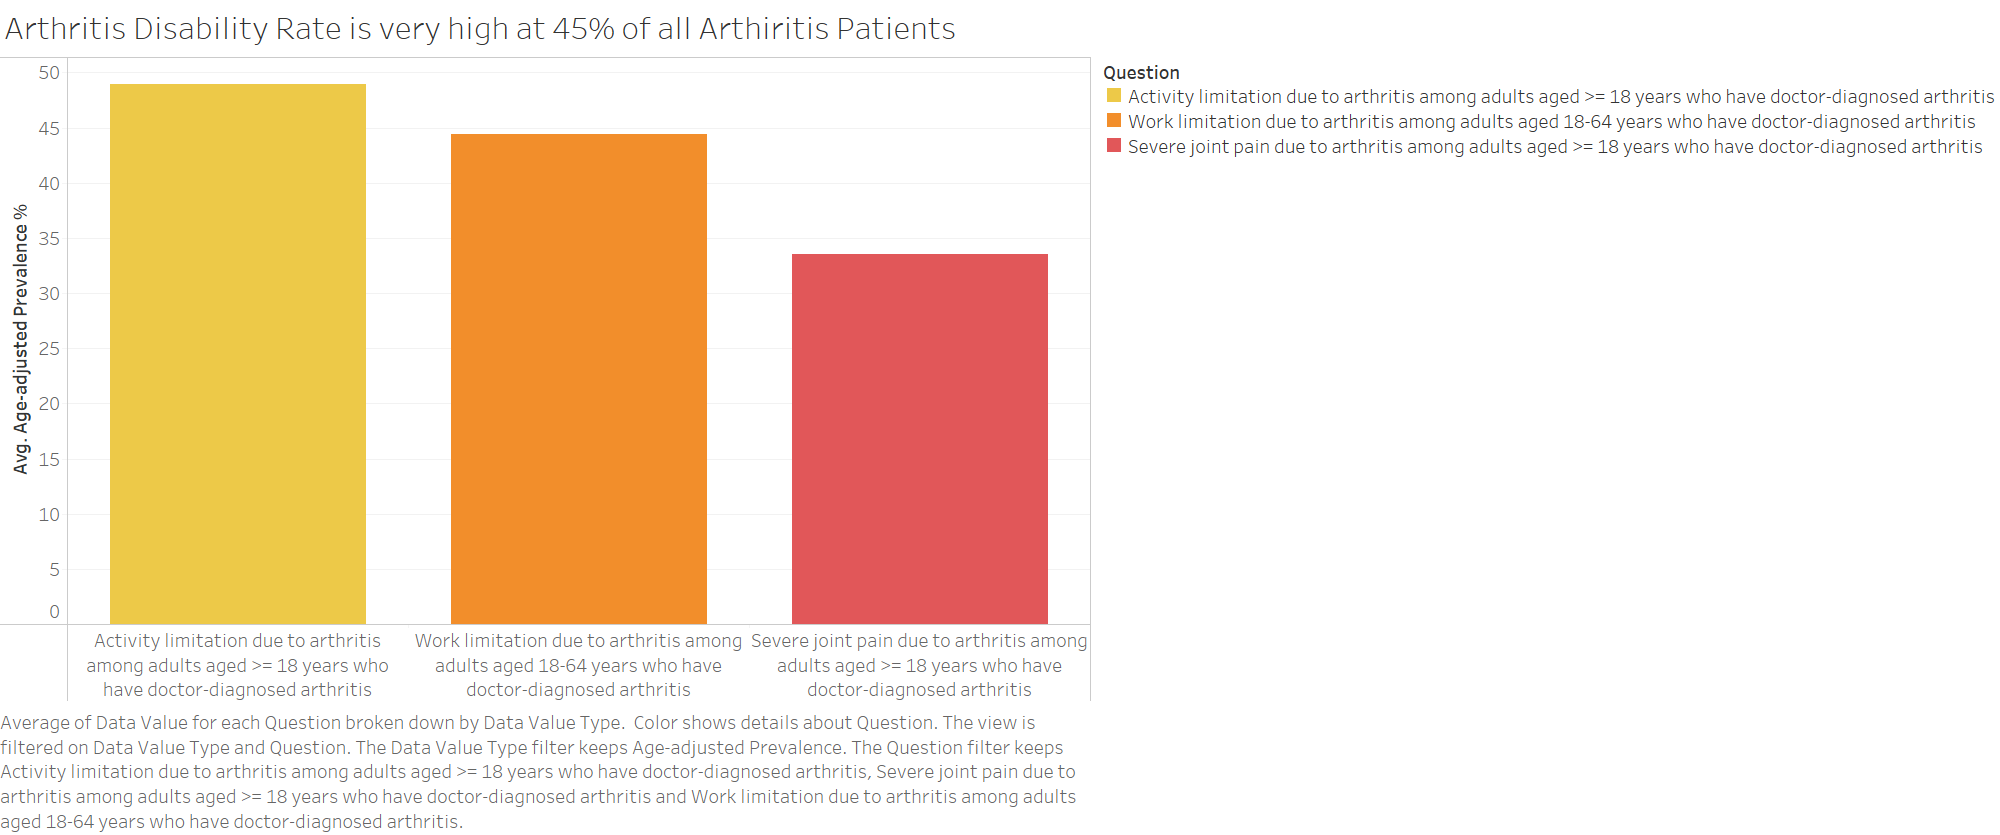

In [ ]:
Image("Arthritis_Disability_High_45%.png")

In [ ]:
uploaded = files.upload()

Saving Arthritis_no_significant_racial_discrimination.png to Arthritis_no_significant_racial_discrimination.png


In [ ]:
Image("Arthritis_no_significant_racial_discrimination.png")

In [ ]:
uploaded = files.upload()

Saving Arthritis_Prevalence_25%_higher_in_Females_as_compared_to_Males.png to Arthritis_Prevalence_25%_higher_in_Females_as_compared_to_Males.png


In [ ]:
Image("Arthritis_Prevalence_25%_higher_in_Females_as_compared_to_Males.png")

In [ ]:
uploaded = files.upload()

Saving Arthritis_Prevalence_25%_in_Adults_causes_HeartDisease_Diabetes.png to Arthritis_Prevalence_25%_in_Adults_causes_HeartDisease_Diabetes.png


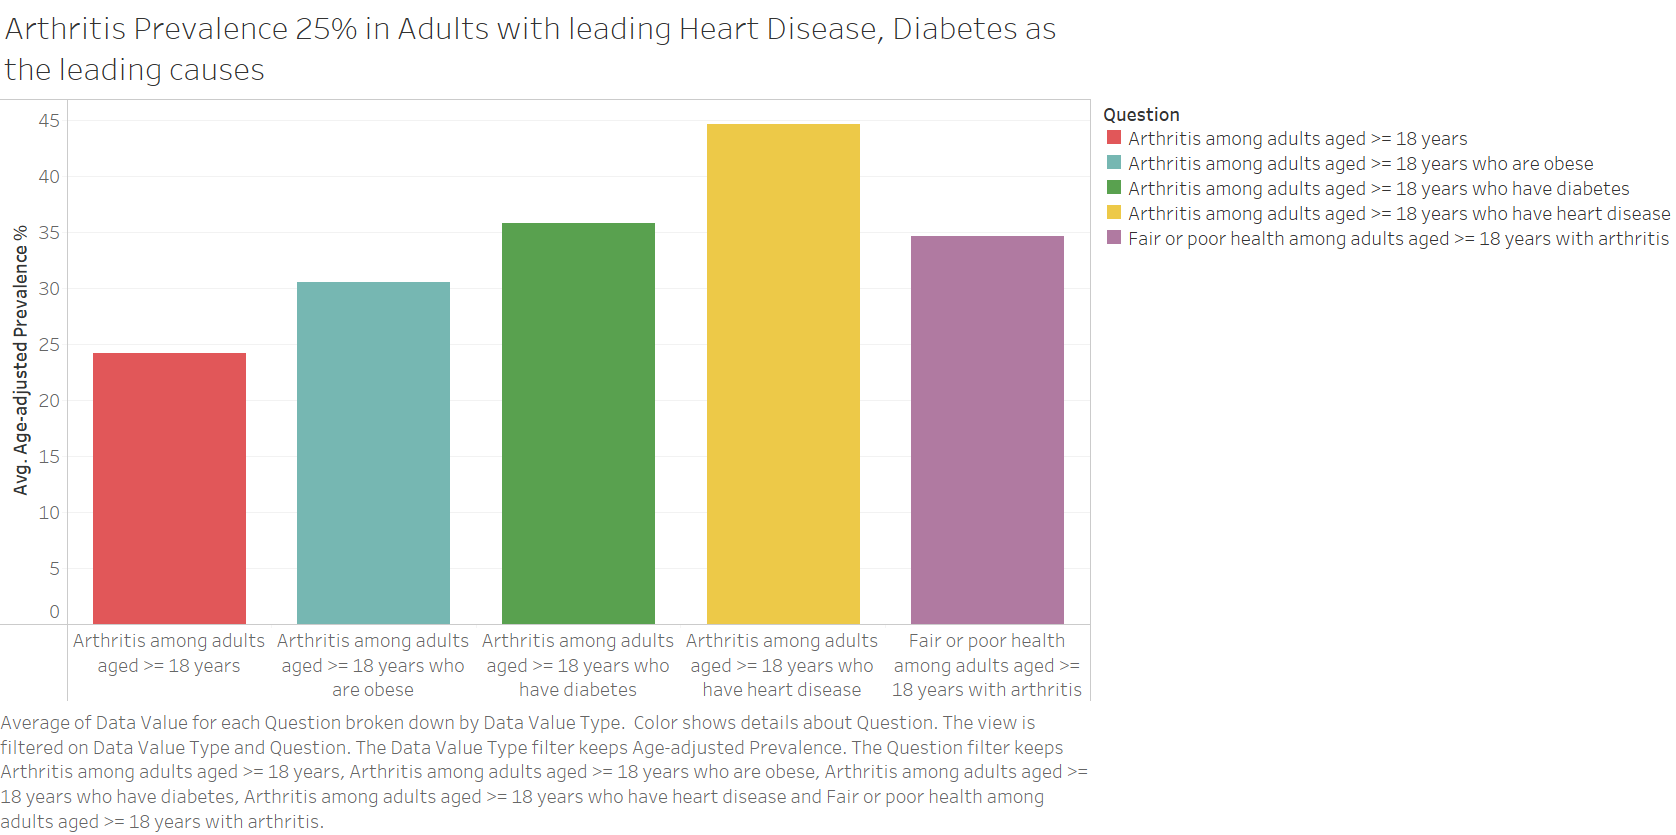

In [ ]:
Image("Arthritis_Prevalence_25%_in_Adults_causes_HeartDisease_Diabetes.png")

### Tobaco Graphs and Analysis

In [ ]:
uploaded = files.upload()

Saving Low_Smoking_States.png to Low_Smoking_States.png


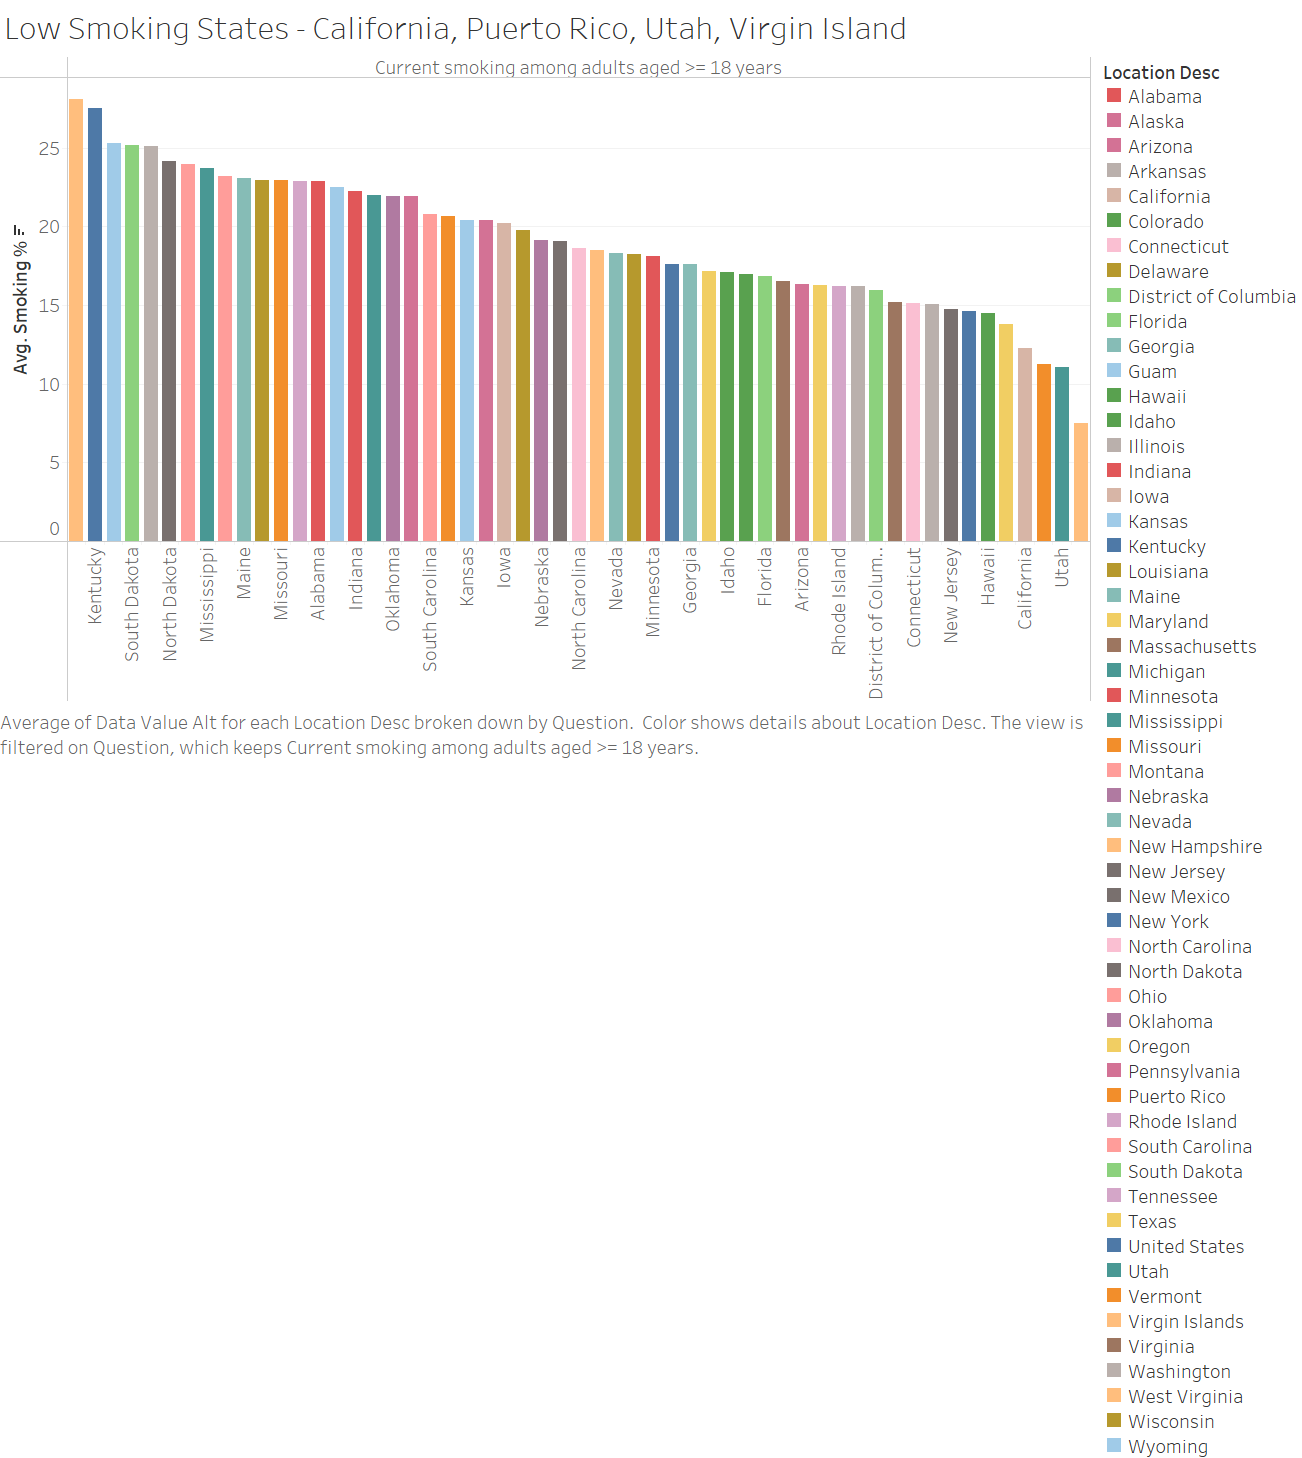

In [ ]:
Image("Low_Smoking_States.png")

In [ ]:
uploaded = files.upload()

Saving Smoking_Before_Pregnancy_and_Ovearall.png to Smoking_Before_Pregnancy_and_Ovearall.png


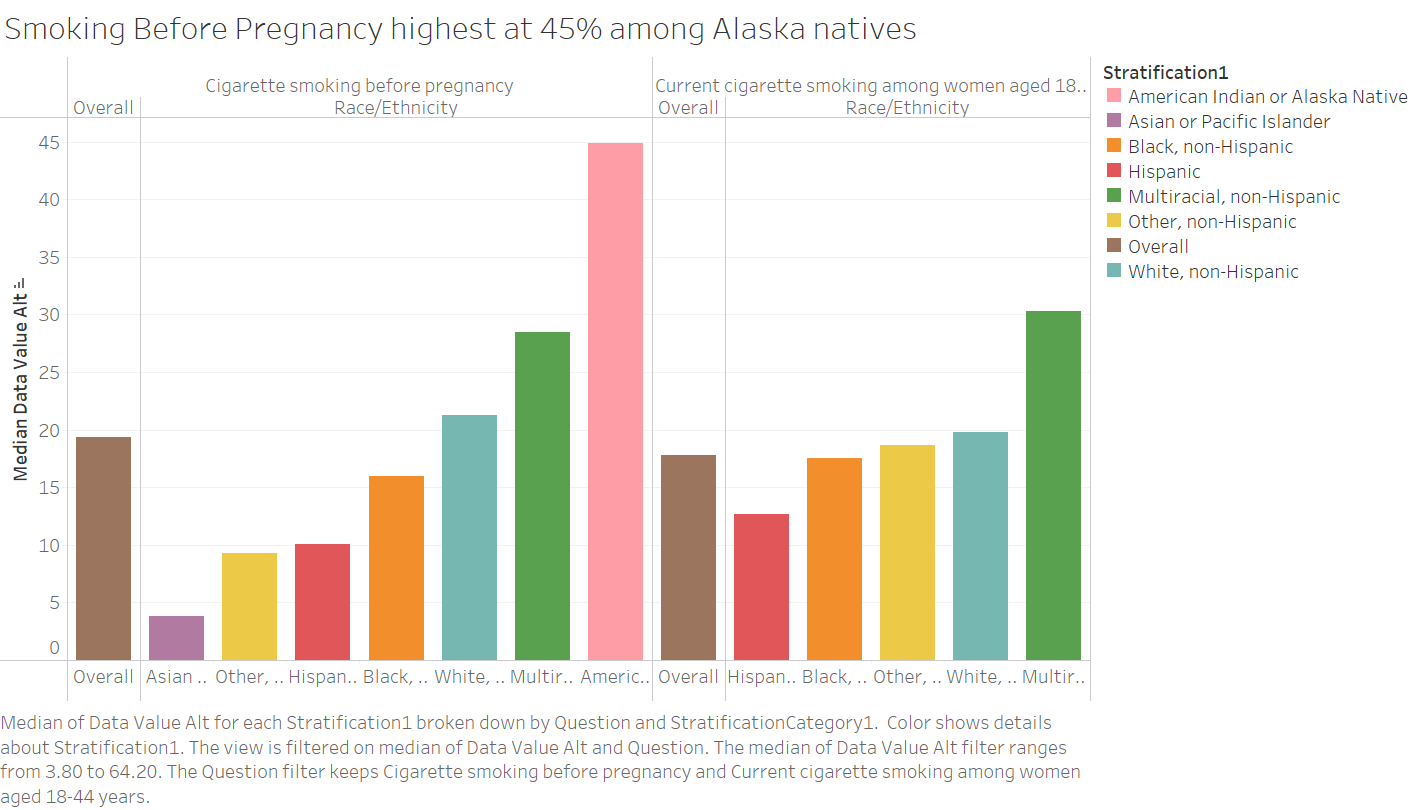

In [ ]:
Image("Smoking_Before_Pregnancy_and_Ovearall.png")

In [ ]:
uploaded = files.upload()

Saving Smoking_Before_Pregnancy-Highest_AlaskaNatives.png to Smoking_Before_Pregnancy-Highest_AlaskaNatives.png


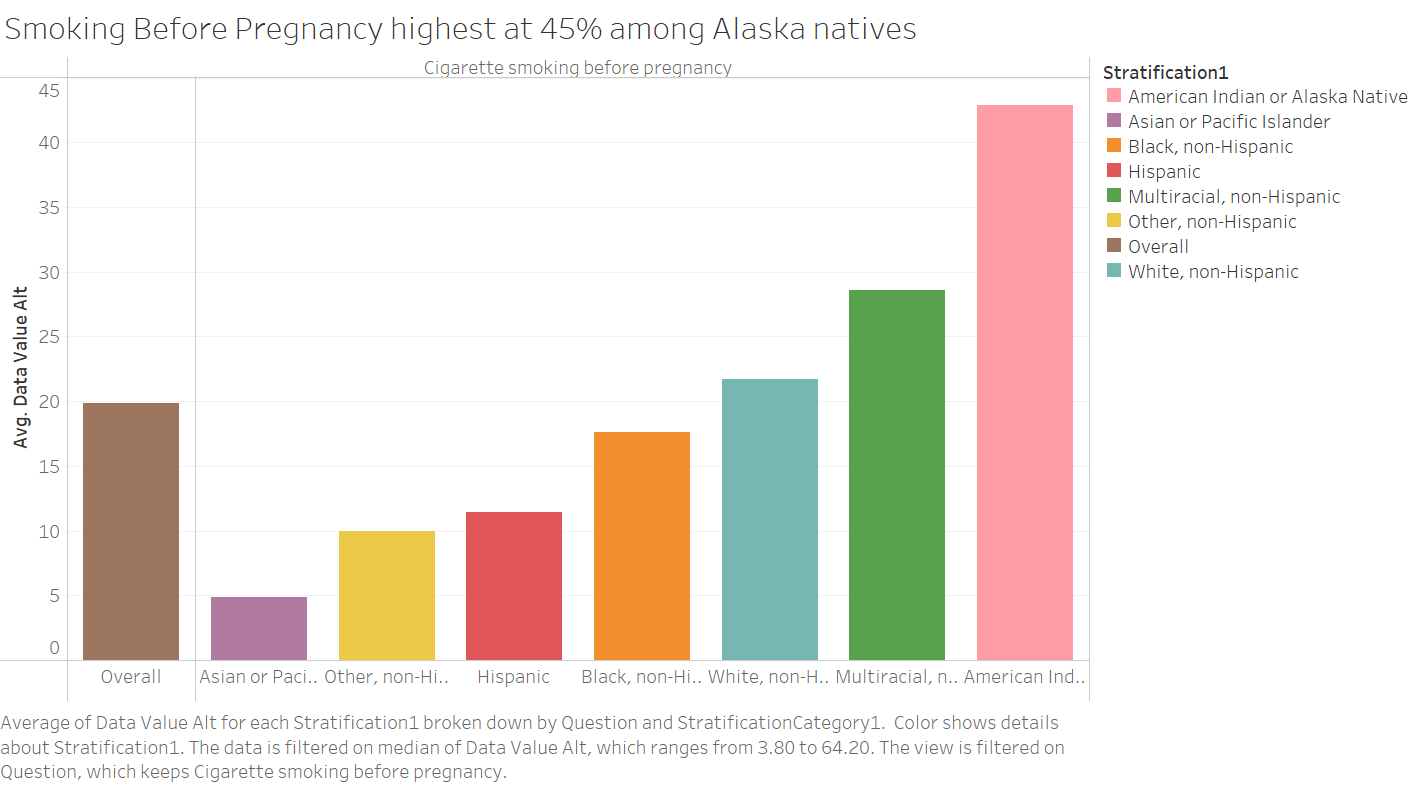

In [ ]:
Image("Smoking_Before_Pregnancy-Highest_AlaskaNatives.png")

In [ ]:
uploaded = files.upload()

Saving Smoking_Least_Among_Asian_Race.png to Smoking_Least_Among_Asian_Race.png


In [ ]:
Image("Smoking_Least_Among_Asian_Race.png")

### Cardiovascular disease Graphs and Analysis

In [ ]:
uploaded = files.upload()

Saving BloodPressureMedicationLow.png to BloodPressureMedicationLow.png


In [ ]:
Image("BloodPressureMedicationLow.png")

In [ ]:
uploaded = files.upload()

Saving CVD_Mortality_Rate_States.png to CVD_Mortality_Rate_States.png


In [ ]:
Image("CVD_Mortality_Rate_States.png")

In [ ]:
uploaded = files.upload()

Saving Decade_of_CV_Mortality_Rate_Decline.png to Decade_of_CV_Mortality_Rate_Decline.png


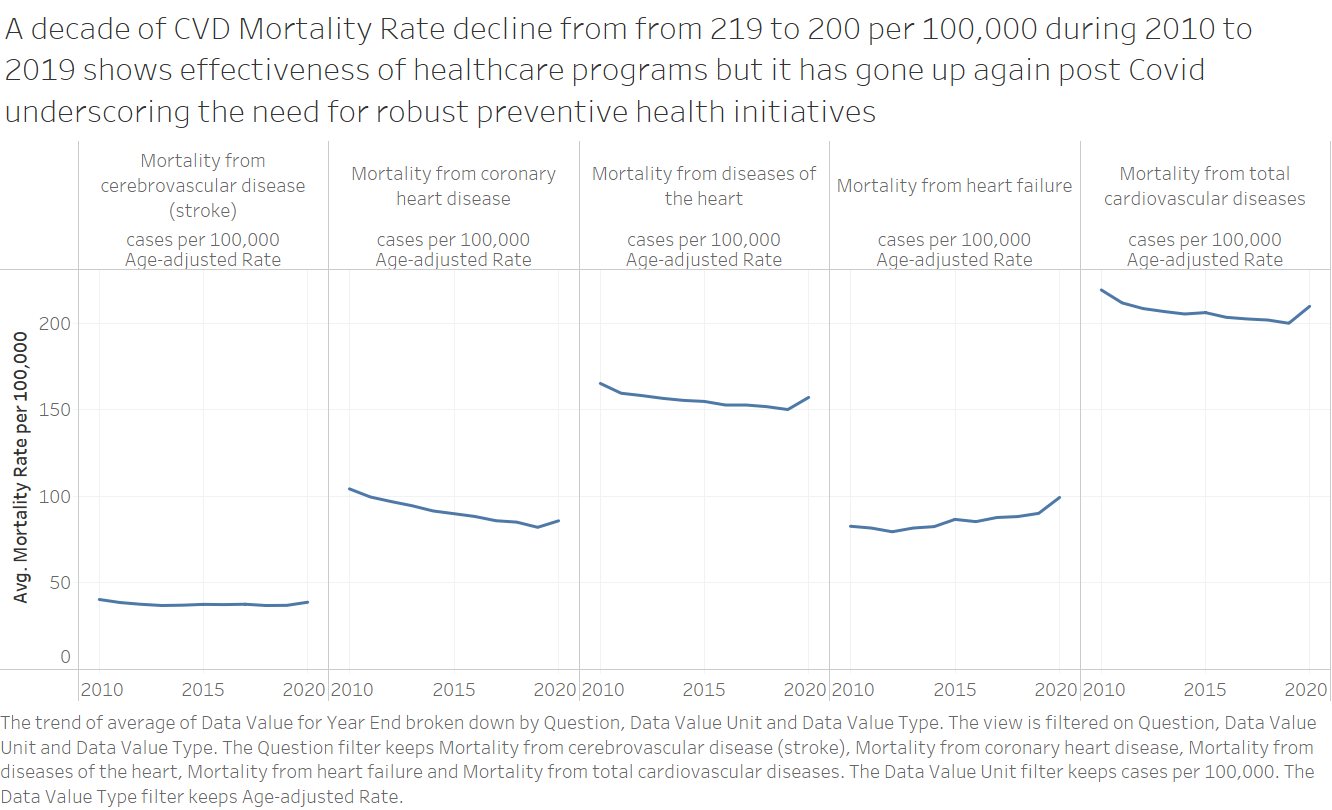

In [ ]:
Image("Decade_of_CV_Mortality_Rate_Decline.png")

In [ ]:
uploaded = files.upload()

Saving Mortality_Rate_to_reach_4.7M.png to Mortality_Rate_to_reach_4.7M.png


In [ ]:
Image("Mortality_Rate_to_reach_4.7M.png")

### Chronic Obstructive Pulmonary Disease Graphs and Analysis

In [ ]:
uploaded = files.upload()

Saving COPD_ED_visits.png to COPD_ED_visits.png


In [ ]:
Image("COPD_ED_visits.png")

In [ ]:
uploaded = files.upload()

Saving COPD_Hospitalization.png to COPD_Hospitalization.png


In [ ]:
Image("COPD_Hospitalization.png")

In [ ]:
uploaded = files.upload()

Saving COPD_Mortality.png to COPD_Mortality.png


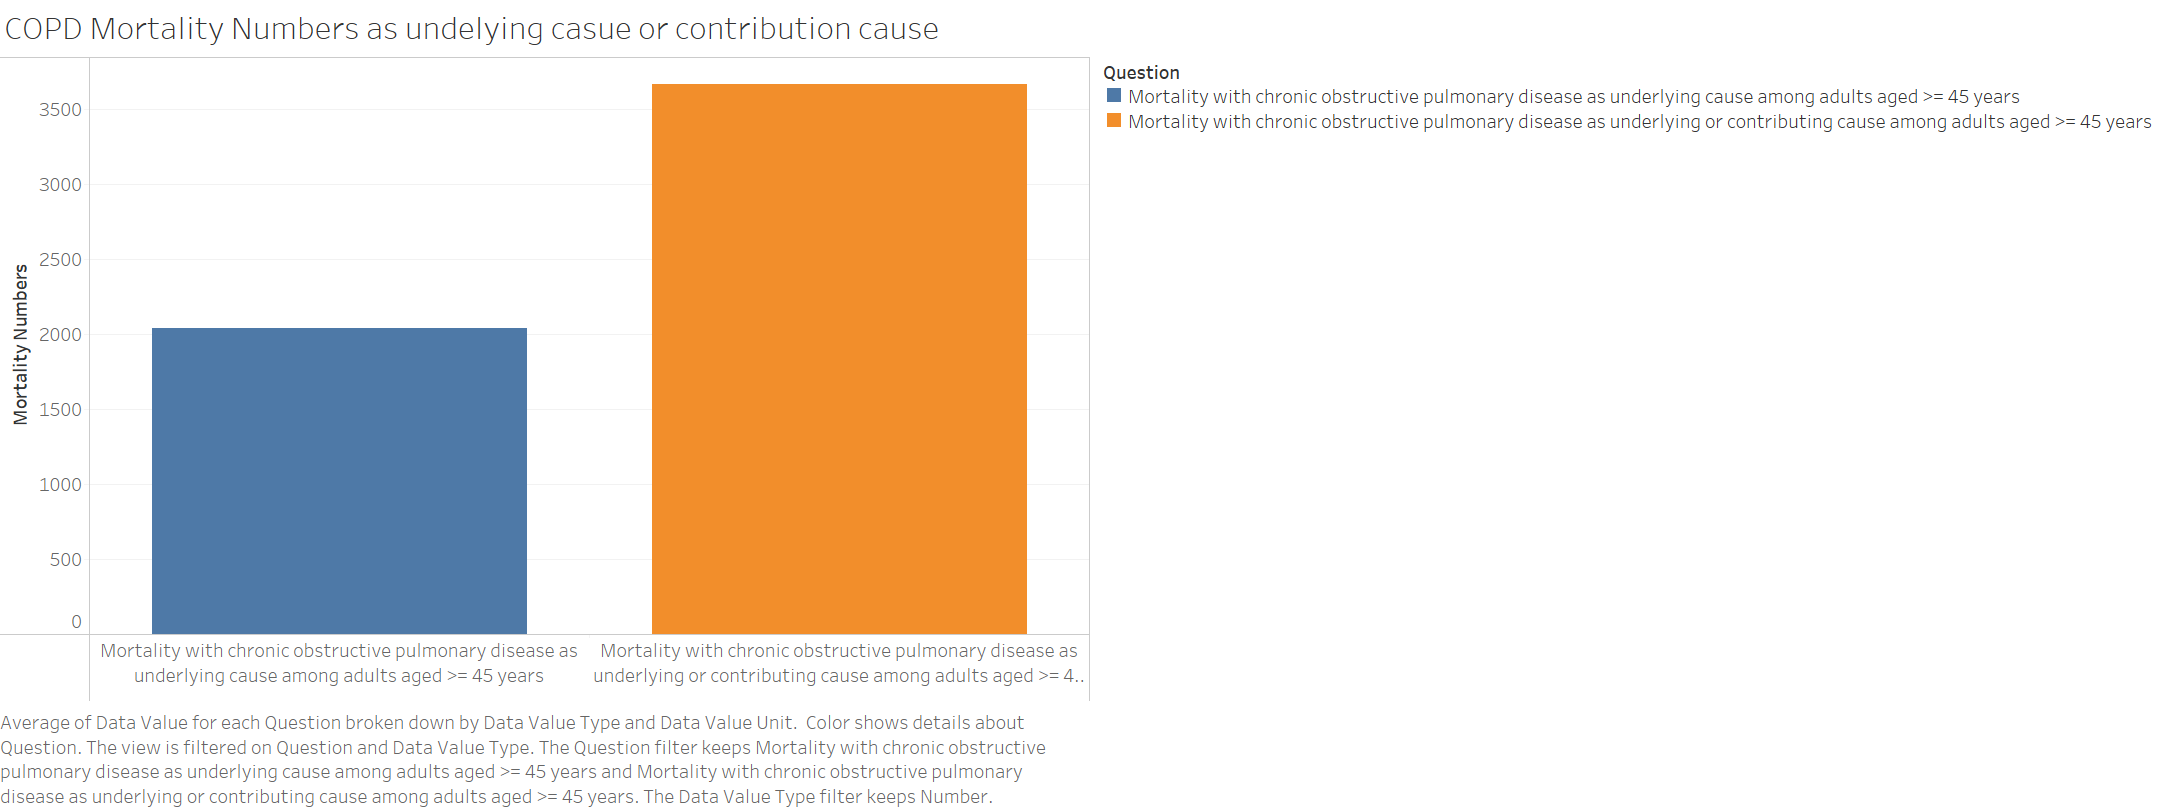

In [ ]:
Image("COPD_Mortality.png")

In [ ]:
uploaded = files.upload()

Saving COPD_Prevalence_trend_Smoking.png to COPD_Prevalence_trend_Smoking.png


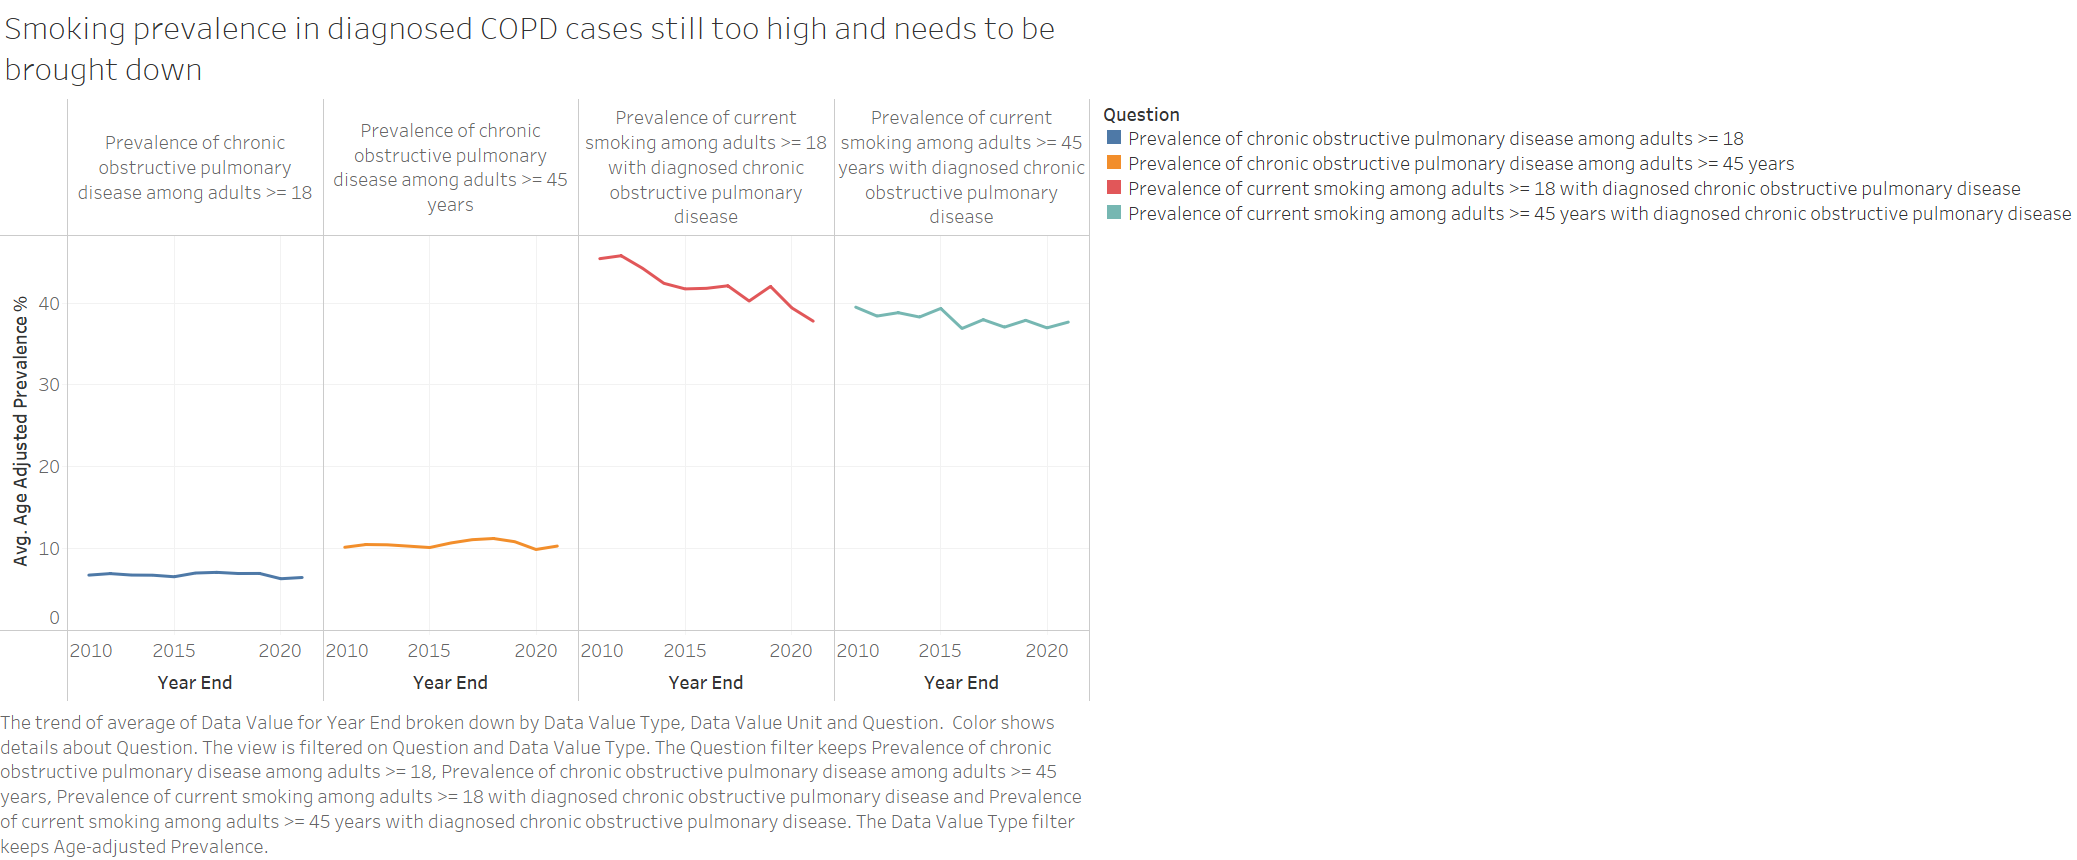

In [ ]:
Image("COPD_Prevalence_trend_Smoking.png")

In [ ]:
uploaded = files.upload()

Saving COPD_Prevalence.png to COPD_Prevalence.png


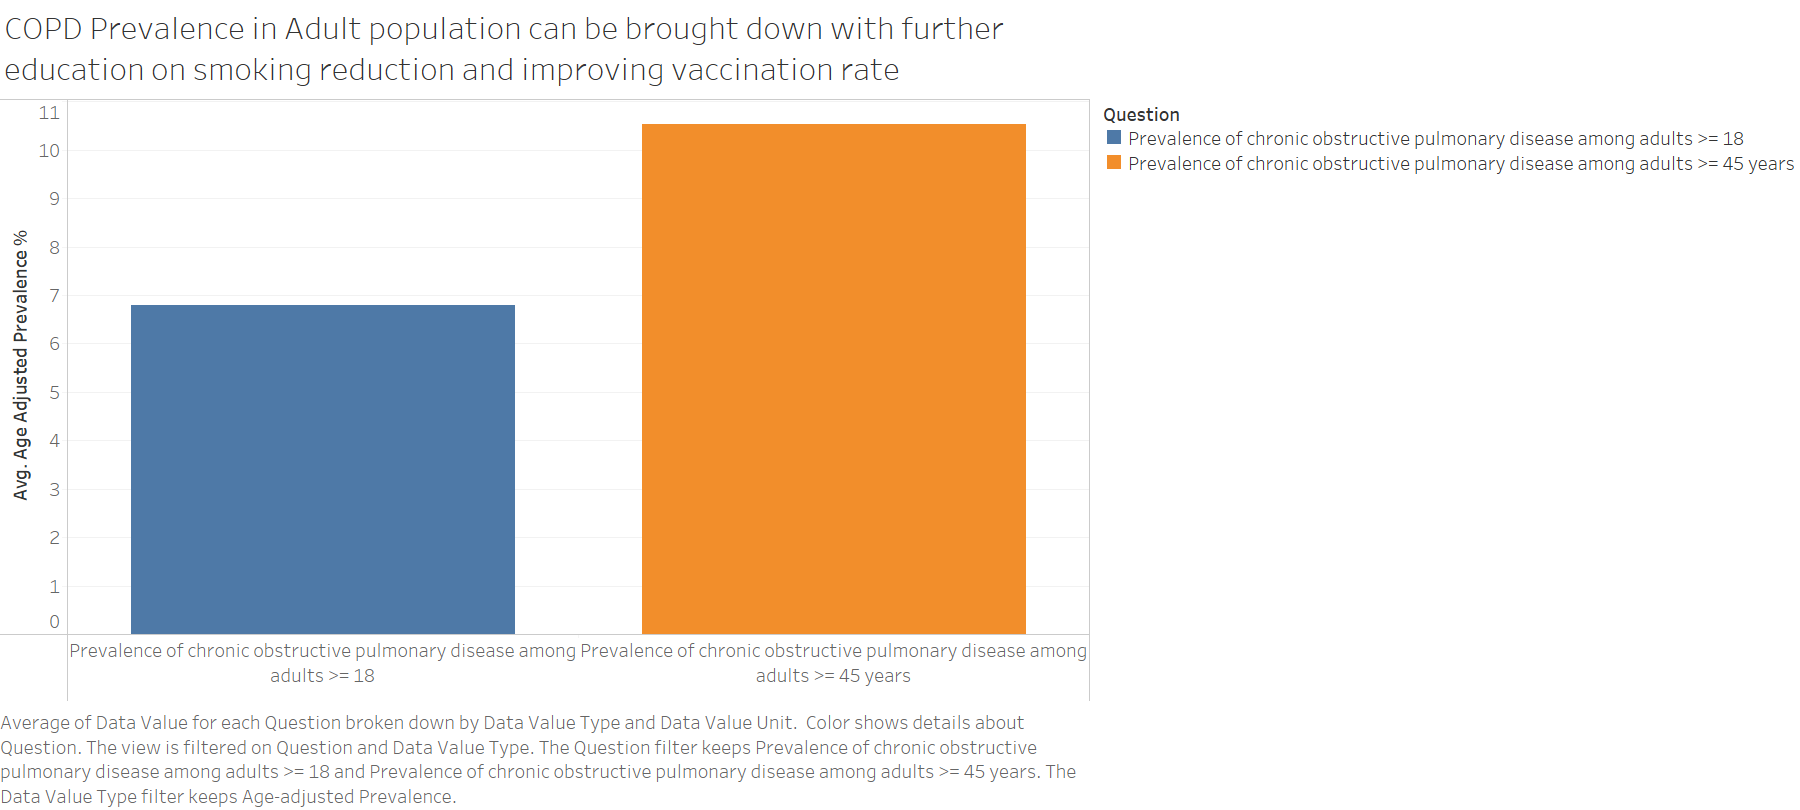

In [ ]:
Image("COPD_Prevalence.png")

In [ ]:
uploaded = files.upload()

Saving COPD_Vaccination.png to COPD_Vaccination.png


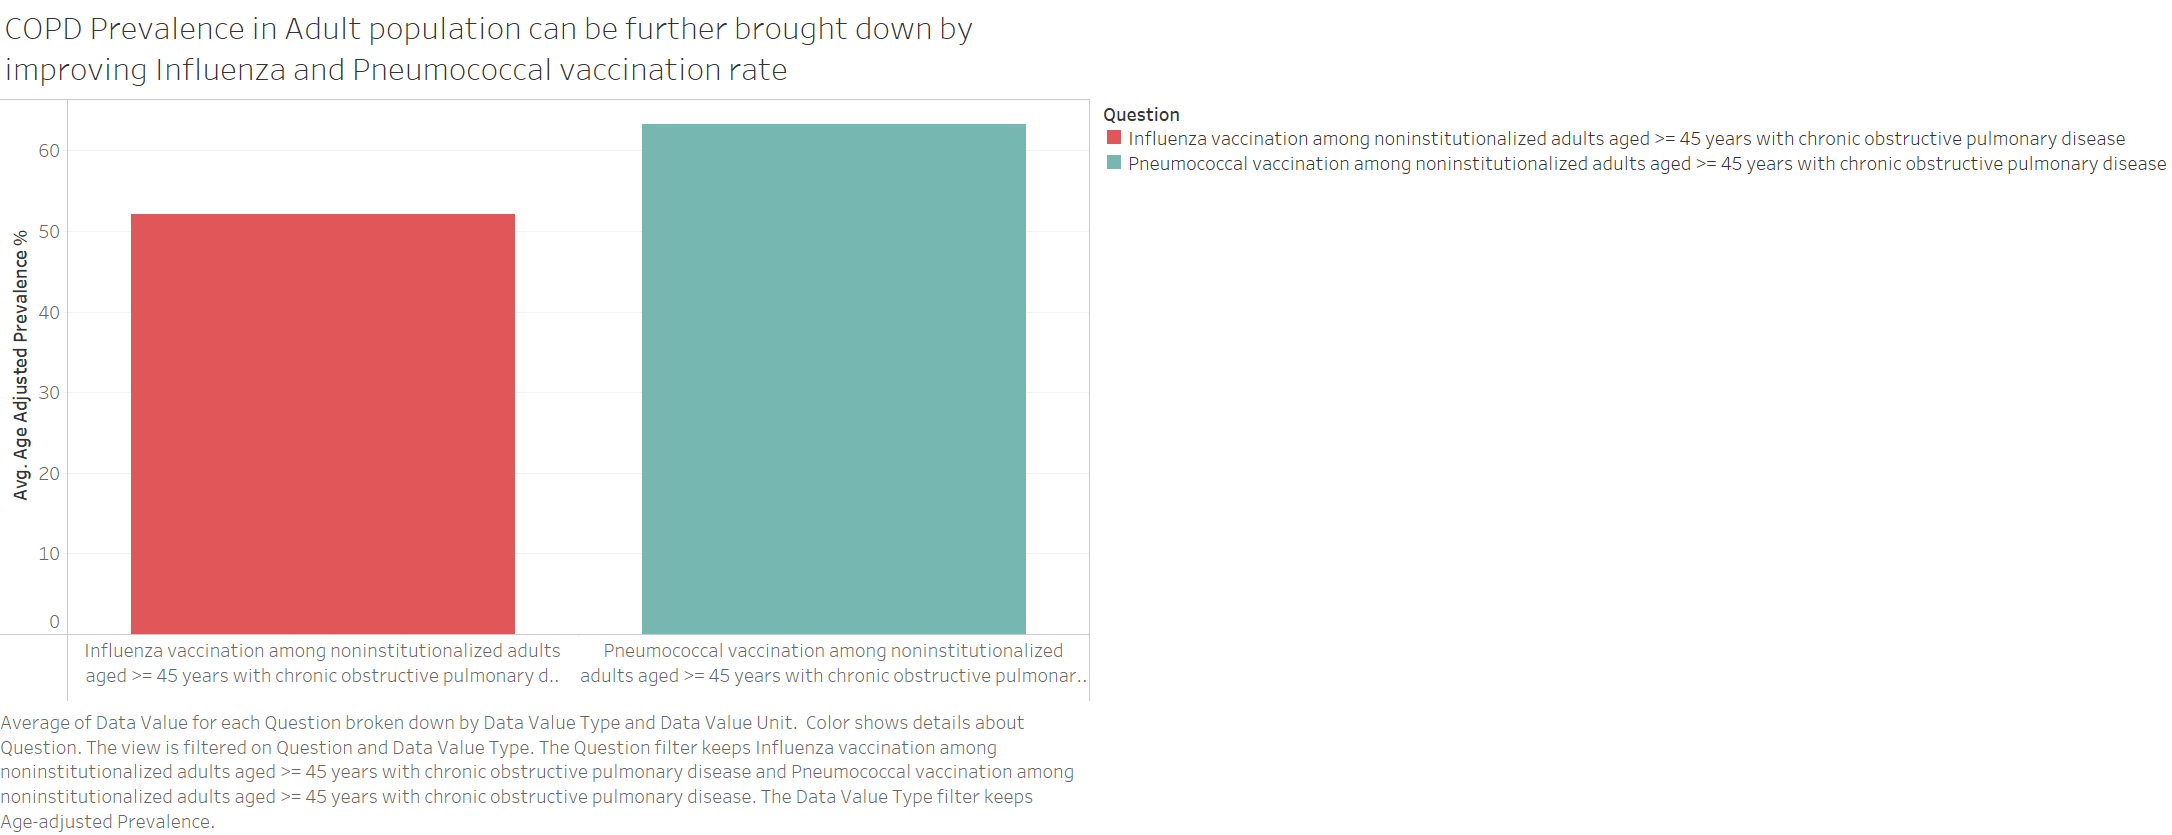

In [ ]:
Image("COPD_Vaccination.png")

### Older Adults Data

In [ ]:
uploaded = files.upload()

Saving OLD1.jpg to OLD1.jpg


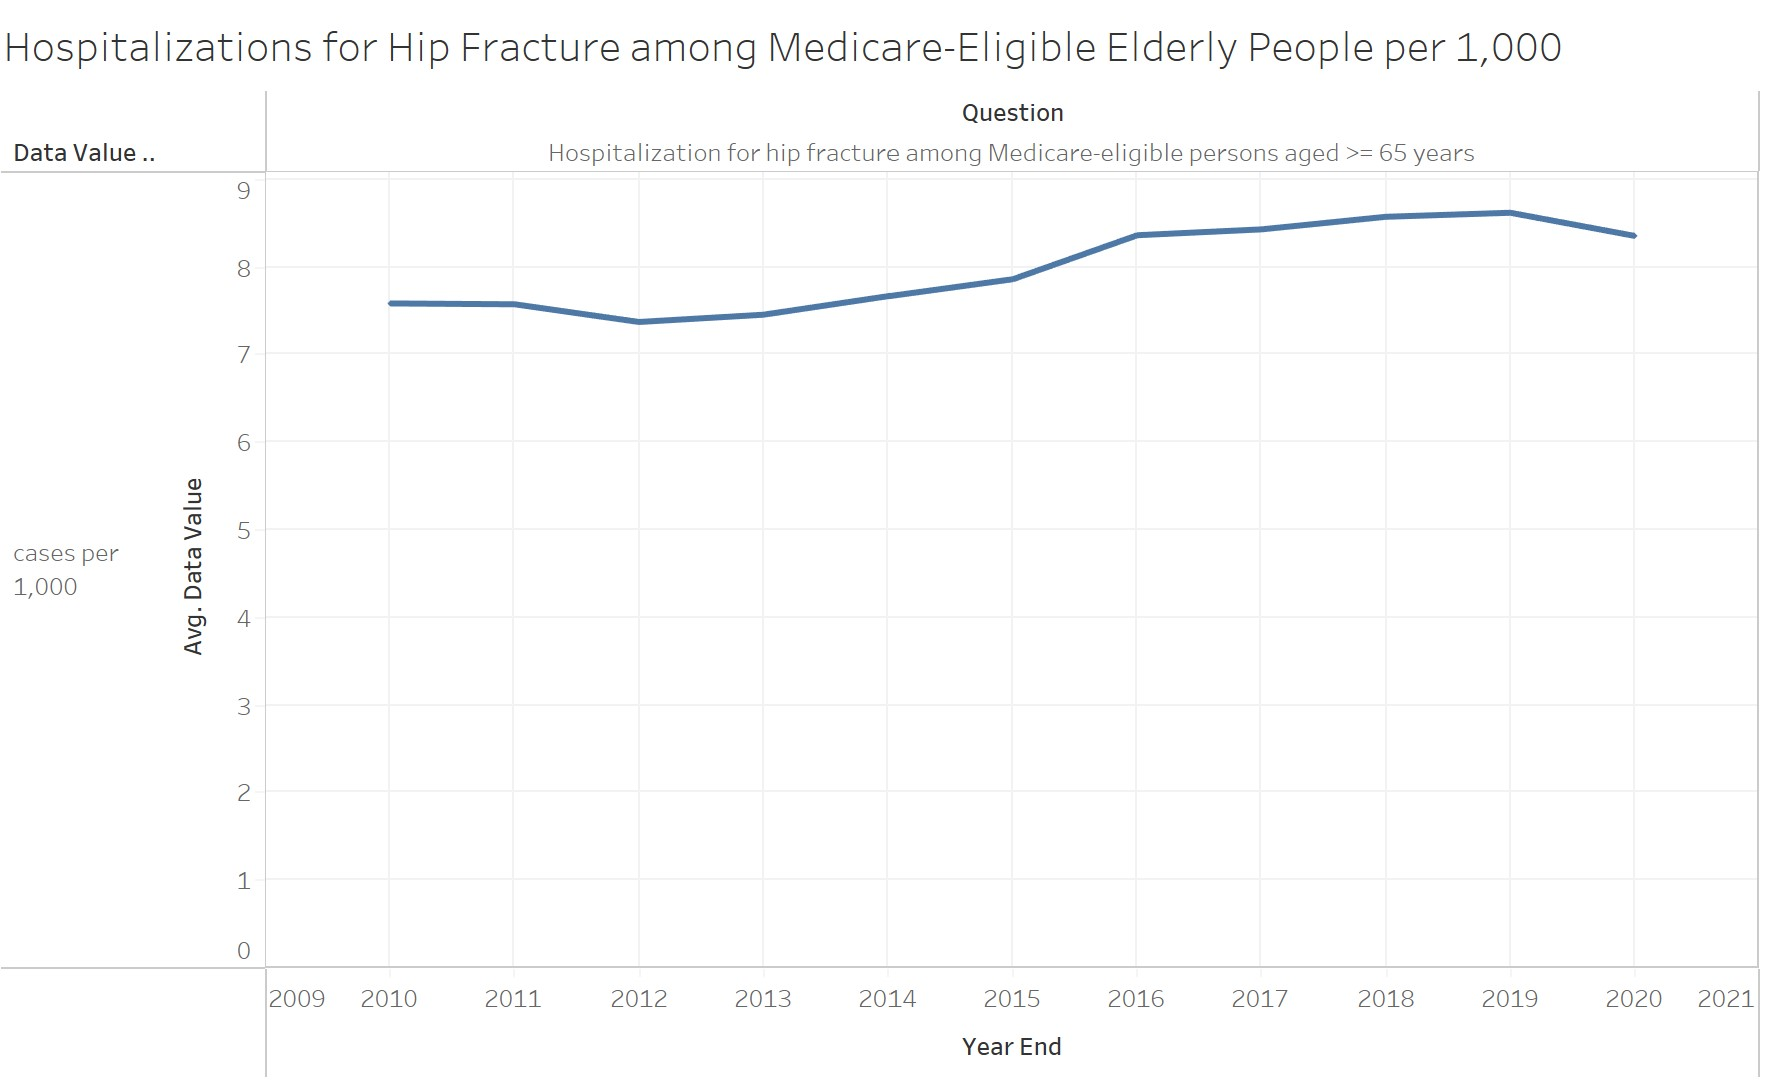

In [ ]:
Image('OLD1.jpg')

In [ ]:
uploaded = files.upload()

Saving OLD2.jpg to OLD2.jpg


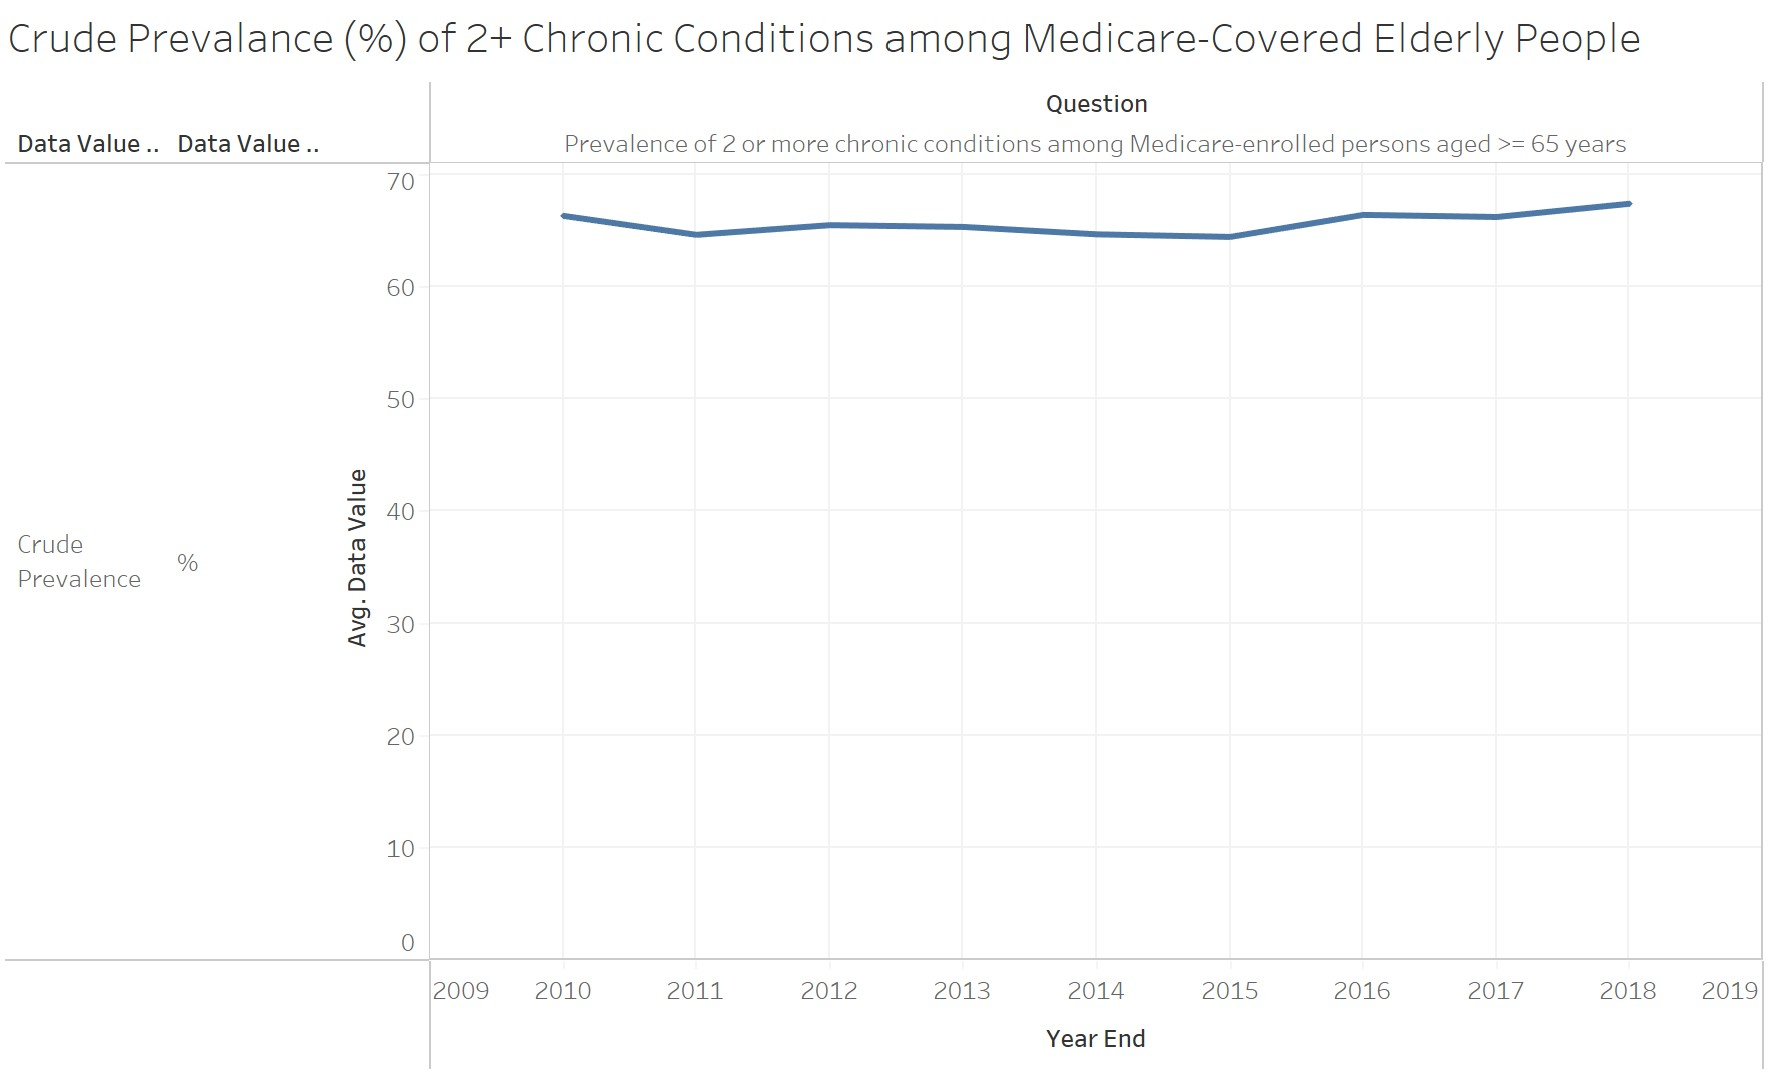

In [ ]:
Image('OLD2.jpg')

### Oral Health Data

In [ ]:
uploaded = files.upload()

Saving Oral Health.jpg to Oral Health.jpg


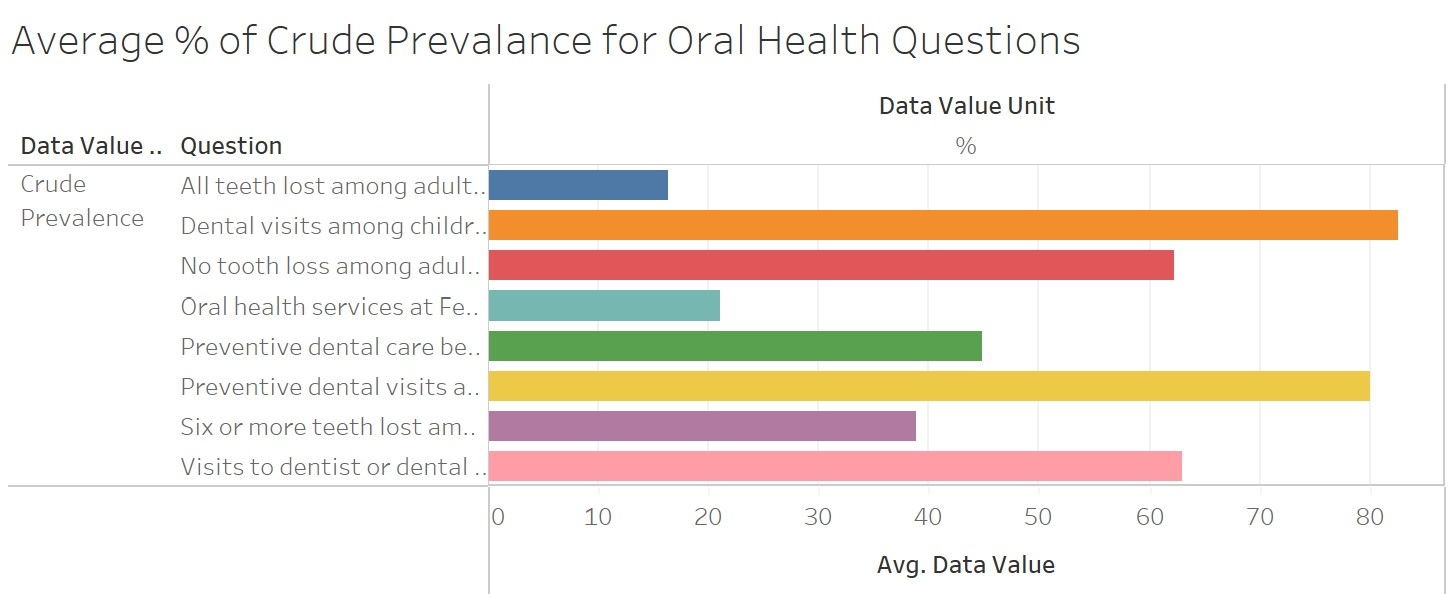

In [ ]:
Image('Oral Health.jpg')

### Immunization Data

In [ ]:
uploaded = files.upload()

Saving VACCINATION.jpeg to VACCINATION.jpeg


In [ ]:
Image('VACCINATION.jpeg')

## Conclusion

1. Early detection of the cancers is the key to add many more years to life.

2. More awareness programs are needed so that population at the younger age can benefit from these tests.

3. Healthy lifestyle habits (clean eating, exercising, avoiding smoking and heavy drinking) are essential for living a health life void of chronic diseases

4. Cancer, CVD and diabetes are especially severe risks to the US population.

5. Time is ticking - the probability of chronic diseases and illnesses rises rapidly with age




